## **Leer la base de datos**

In [ ]:
# Conectar Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ubicacion = '/content/drive/MyDrive/WE/ProyectoIntegrador/training_v2.csv'
df = pd.read_csv(ubicacion)
print(df.shape) # Devuelve cantidad de filas y columnas (filas, columnas)
df.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## **ANÁLISIS EXPLORATORIO**

### **Análisis de duplicados (identificación de llaves)**

In [ ]:
df.head(3)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic


In [ ]:
# Contar los duplicados basados en columnas específicas
duplicados_count = df.duplicated(subset=['encounter_id']).sum()

print(f"Número de Duplicados basados en  encounter_id: {duplicados_count}")

Número de Duplicados basados en  encounter_id: 0


In [ ]:
# Contar los duplicados basados en columnas específicas
duplicados_count = df.duplicated(subset=['patient_id']).sum()

print(f"Número de Duplicados basados en  patient_id: {duplicados_count}")

Número de Duplicados basados en  patient_id: 0


In [ ]:
# Contar los duplicados basados en columnas específicas
duplicados_count = df.duplicated(subset=['hospital_id']).sum()

print(f"Número de Duplicados basados en  hospital_id: {duplicados_count}")

Número de Duplicados basados en  hospital_id: 91566


In [ ]:
# Contar los duplicados basados en columnas específicas
duplicados_count = df.duplicated(subset=['encounter_id','hospital_id']).sum()

print(f"Número de Duplicados basados en encounter_id y hospital_idU: {duplicados_count}")

Número de Duplicados basados en encounter_id y hospital_idU: 0


**Conclusión:** **encounter_id**, que identifica la estancia de un paciente en UCI, es la llave primaria de la tabla. No hay presencia de valores duplicados.

### **Análisis y corrección de tipos de datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


Se comparó el tipo de dato de las variables con el diccionario de datos y se muestran solo las variables cuyo tipo de dato es incorrecto.

In [ ]:
df['age'].info() #tipo de dato correcto: int, edad en años

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: age
Non-Null Count  Dtype  
--------------  -----  
87485 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['apache_2_diagnosis'].info() #tipo de dato correcto: string, es una categoría diagnóstica

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: apache_2_diagnosis
Non-Null Count  Dtype  
--------------  -----  
90051 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['apache_2_diagnosis'].head(3)

,apache_2_diagnosis
0,113.0
1,108.0
2,122.0


Los ".0" de **apache_2_diagnosis** deben quitarse después de cambiar el tipo de dato a string, porque no hay subcategorías dentro del código de diagnóstico.

In [ ]:
df['apache_3j_diagnosis'].info() #tipo de dato correcto: string, es una categoría diagnóstica

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: apache_3j_diagnosis
Non-Null Count  Dtype  
--------------  -----  
90612 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['apache_3j_diagnosis'].head(3)

,apache_3j_diagnosis
0,502.01
1,203.01
2,703.03


Los "decimales" en **apache_3j_diagnosis** representan un estructura jerárquica de codificación para el diagnóstico, por lo cual deben mantenerse.

In [ ]:
df['arf_apache'].info() #tipo de dato correcto: int, variable binaria, si el paciente tuvo insuficiencia renal aguda

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: arf_apache
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['gcs_eyes_apache'].info() #tipo de dato correcto: int, es una puntuación discreta de la escala ocular del Glasgow Coma Scale (GCS)

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: gcs_eyes_apache
Non-Null Count  Dtype  
--------------  -----  
89812 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['gcs_motor_apache'].info() #tipo de dato correcto: int, es una puntuación discreta de la escala motora del Glasgow Coma Scale (GCS)

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: gcs_motor_apache
Non-Null Count  Dtype  
--------------  -----  
89812 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['gcs_unable_apache'].info() #tipo de dato correcto: int, variable binaria, si no se pudo evaluar la escala de coma de Glasgow debido a la sedación del paciente

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: gcs_unable_apache
Non-Null Count  Dtype  
--------------  -----  
90676 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['gcs_verbal_apache'].info() #tipo de dato correcto: int, es una puntuación discreta de la escala verbal del Glasgow Coma Scale (GCS)

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: gcs_verbal_apache
Non-Null Count  Dtype  
--------------  -----  
89812 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['intubated_apache'].info() #tipo de dato correcto: int, variable binaria, si el paciente fue intubado

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: intubated_apache
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['ventilated_apache'].info() #tipo de dato correcto: int, variable binaria, si el paciente estaba ventilado de forma invasiva

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: ventilated_apache
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['aids'].info() #tipo de dato correcto: int, variable binaria, si el paciente fue diagnosticado con SIDA

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: aids
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['cirrhosis'].info() #tipo de dato correcto: int, variable binaria, si el paciente tiene cirrosis

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: cirrhosis
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['diabetes_mellitus'].info() #tipo de dato correcto: int, variable binaria, si el paciente fue diagnosticado con diabetes

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: diabetes_mellitus
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['hepatic_failure'].info() #tipo de dato correcto: int, variable binaria, si el paciente tiene falla hepática

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: hepatic_failure
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['immunosuppression'].info() #tipo de dato correcto: int, variable binaria, si el paciente tiene el sistema inmunitario suprimido

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: immunosuppression
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['leukemia'].info() #tipo de dato correcto: int, variable binaria, si al paciente se le ha diagnosticado leucemia

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: leukemia
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['lymphoma'].info() #tipo de dato correcto: int, variable binaria, si el paciente ha sido diagnosticado de linfoma no Hodgkin.

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: lymphoma
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
df['solid_tumor_with_metastasis'].info() #tipo de dato correcto: int, variable binaria, si el paciente fue diagnosticado con algún carcinoma de tumor sólido con metástasis

<class 'pandas.core.series.Series'>
RangeIndex: 91713 entries, 0 to 91712
Series name: solid_tumor_with_metastasis
Non-Null Count  Dtype  
--------------  -----  
90998 non-null  float64
dtypes: float64(1)
memory usage: 716.6 KB


In [ ]:
# Cambio de float a string
df['apache_2_diagnosis'] = df['apache_2_diagnosis'].astype(str)
df['apache_3j_diagnosis'] = df['apache_3j_diagnosis'].astype(str)

In [ ]:
# Mantener solo los caracteres antes del punto
df['apache_2_diagnosis'] = df['apache_2_diagnosis'].astype(str).str.split('.').str[0]

In [ ]:
df[['apache_2_diagnosis','apache_3j_diagnosis']].head()

,apache_2_diagnosis,apache_3j_diagnosis
0,113,502.01
1,108,203.01
2,122,703.03
3,203,1206.03
4,119,601.01


In [ ]:
# Cambio de float a Int64 por la presencia de nulos
df['age']=df['age'].astype('Int64')
df['arf_apache']=df['arf_apache'].astype('Int64')
df['gcs_eyes_apache']=df['gcs_eyes_apache'].astype('Int64')
df['gcs_motor_apache']=df['gcs_motor_apache'].astype('Int64')
df['gcs_unable_apache']=df['gcs_unable_apache'].astype('Int64')
df['gcs_verbal_apache']=df['gcs_verbal_apache'].astype('Int64')
df['intubated_apache']=df['intubated_apache'].astype('Int64')
df['ventilated_apache']=df['ventilated_apache'].astype('Int64')
df['aids']=df['aids'].astype('Int64')
df['cirrhosis']=df['cirrhosis'].astype('Int64')
df['diabetes_mellitus']=df['diabetes_mellitus'].astype('Int64')
df['hepatic_failure']=df['hepatic_failure'].astype('Int64')
df['immunosuppression']=df['immunosuppression'].astype('Int64')
df['leukemia']=df['leukemia'].astype('Int64')
df['lymphoma']=df['lymphoma'].astype('Int64')
df['solid_tumor_with_metastasis']=df['solid_tumor_with_metastasis'].astype('Int64')

In [ ]:
# Cambiando id de int a string
df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_id'] = df['patient_id'].astype(str)
df['hospital_id'] = df['hospital_id'].astype(str)
df['icu_id'] = df['icu_id'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: Int64(16), float64(152), int64(4), object(14)
memory usage: 131.5+ MB


In [ ]:
df.head(3)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68,22.73,0,Caucasian,M,180.3,...,0,0,1,0,0,0,0,0,Sepsis,Cardiovascular
1,114252,59342,81,0,77,27.42,0,Caucasian,F,160.0,...,0,0,1,0,0,0,0,0,Respiratory,Respiratory
2,119783,50777,118,0,25,31.95,0,Caucasian,F,172.7,...,0,0,0,0,0,0,0,0,Metabolic,Metabolic


### **Análisis de medidas de posición y dispersión**

#### **Variables numéricas**

In [ ]:
# Filtrar solo columnas numéricas
import numpy as np
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

# Sacando de la lista de análisis a las variables binarias y categóricas codificadas
num_cols = list(num_cols)
num_cols.remove('hospital_death')
num_cols.remove('elective_surgery')
num_cols.remove('readmission_status')
num_cols.remove('arf_apache')
num_cols.remove('gcs_eyes_apache')
num_cols.remove('gcs_verbal_apache')
num_cols.remove('gcs_motor_apache')
num_cols.remove('aids')
num_cols.remove('cirrhosis')
num_cols.remove('apache_post_operative')
num_cols.remove('diabetes_mellitus')
num_cols.remove('hepatic_failure')
num_cols.remove('immunosuppression')
num_cols.remove('leukemia')
num_cols.remove('lymphoma')
num_cols.remove('solid_tumor_with_metastasis')
num_cols.remove('intubated_apache')
num_cols.remove('gcs_unable_apache')
num_cols.remove('ventilated_apache')

num_cols

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache',
       'apache_post_operative',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=172)


['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_invasive_max',
 'h1_dia

In [ ]:
df[num_cols].describe()

,age,bmi,height,pre_icu_los_days,weight,albumin_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,87485.0,88284.000000,90379.000000,91713.000000,88993.000000,37334.000000,33579.000000,72451.00000,72860.000000,20845.000000,...,15754.000000,15754.000000,15289.000000,15289.000000,15768.000000,15768.000000,11518.000000,11518.000000,83766.000000,83766.000000
mean,62.309516,29.185818,169.641588,0.835766,84.028340,2.902968,1.147721,25.82533,1.480014,0.595751,...,44.668444,43.383453,7.338363,7.327883,163.841354,144.154224,244.404982,235.933050,0.086787,0.043955
std,16.775119,8.275142,10.795378,2.487756,25.011497,0.681863,2.165538,20.67298,1.525787,0.263238,...,14.630907,14.113107,0.105821,0.107873,113.455738,98.464543,129.964308,126.458507,0.247569,0.217341
min,16.0,14.844926,137.200000,-24.947222,38.600000,1.200000,0.100000,4.00000,0.300000,0.210000,...,15.000000,14.997000,6.930000,6.900000,34.000000,31.000000,42.000000,38.000000,-1.000000,-1.000000
25%,52.0,23.641975,162.500000,0.035417,66.800000,2.400000,0.400000,13.00000,0.720000,0.400000,...,36.000000,35.000000,7.290000,7.280000,80.700000,77.000000,142.000000,136.000000,0.020000,0.010000
50%,65.0,27.654655,170.100000,0.138889,80.300000,2.900000,0.600000,19.00000,0.980000,0.500000,...,42.100000,41.000000,7.350000,7.340000,120.000000,107.000000,223.333333,214.000000,0.050000,0.020000
75%,75.0,32.930206,177.800000,0.409028,97.100000,3.400000,1.100000,32.00000,1.530000,0.850000,...,49.200000,48.000000,7.410000,7.400000,216.000000,178.000000,328.000000,317.475000,0.130000,0.060000
max,89.0,67.814990,195.590000,159.090972,186.000000,4.600000,51.000000,127.00000,11.180000,1.000000,...,111.505000,107.000000,7.570000,7.563000,534.905000,514.905000,720.000000,654.813793,0.990000,0.970000


Se selecionaron 15 variables numéricas para el análisis.

In [ ]:
df2=df[['age','bmi','height','weight','pre_icu_los_days','bilirubin_apache','bun_apache','fio2_apache','heart_rate_apache','resprate_apache','hematocrit_apache','temp_apache','sodium_apache','map_apache','creatinine_apache']]

In [ ]:
df2.describe()

,age,bmi,height,weight,pre_icu_los_days,bilirubin_apache,bun_apache,fio2_apache,heart_rate_apache,resprate_apache,hematocrit_apache,temp_apache,sodium_apache,map_apache,creatinine_apache
count,87485.0,88284.000000,90379.000000,88993.000000,91713.000000,33579.000000,72451.00000,20845.000000,90835.000000,90479.000000,71835.000000,87605.000000,73113.000000,90719.000000,72860.000000
mean,62.309516,29.185818,169.641588,84.028340,0.835766,1.147721,25.82533,0.595751,99.707932,25.811007,32.988739,36.414472,137.966373,88.015873,1.480014
std,16.775119,8.275142,10.795378,25.011497,2.487756,2.165538,20.67298,0.263238,30.870502,15.106312,6.873585,0.833496,5.279418,42.032412,1.525787
min,16.0,14.844926,137.200000,38.600000,-24.947222,0.100000,4.00000,0.210000,30.000000,4.000000,16.200000,32.100000,117.000000,40.000000,0.300000
25%,52.0,23.641975,162.500000,66.800000,0.035417,0.400000,13.00000,0.400000,86.000000,11.000000,28.000000,36.200000,135.000000,54.000000,0.720000
50%,65.0,27.654655,170.100000,80.300000,0.138889,0.600000,19.00000,0.500000,104.000000,28.000000,33.200000,36.500000,138.000000,67.000000,0.980000
75%,75.0,32.930206,177.800000,97.100000,0.409028,1.100000,32.00000,0.850000,120.000000,36.000000,37.900000,36.700000,141.000000,125.000000,1.530000
max,89.0,67.814990,195.590000,186.000000,159.090972,51.000000,127.00000,1.000000,178.000000,60.000000,51.400000,39.700000,158.000000,200.000000,11.180000




1. **age:** Los pacientes en promedio tienen 62 años de edad, con una desviación estándar considerable de 17 años. Los pacientes más jóvenes tienen 16 años; mientras que los más ancianos, 89 años. El 25% de los pacientes tiene como máximo 52 años. La mediana es 65 años y cercana a la media, por lo que la edad promedio representa adecuadamente a la muestra. El 75% de pacientes tiene a lo más 75 años y el 25% superior tiene entre 75 y 89 años.

2. **bmi:** El Índice de Masa Corporal (IMC) de los pacientes está alrededor de 29.18, una condición de sobrepreso, con una desviación estándar considerable de 8.27. El menor valor de IMC registrado en un paciente es 14.84, asociado a un peso bajo. Por otro lado, el mayor valor de IMC es 67.81, correspondiente a obesidad mórbida. El 25% de pacientes tiene como máximo valor 23.64 de IMC, dentro de peso normal. La mediana es 27.65 de IMC y similar a la media, por lo que no hay muchos valores atípicos extremos. El 75% de pacientes tiene a lo más valor 32.93 de IMC, lo que indica obesidad leve; mientras que el 25% superior tiene un valor de IMC entre 32.93 y 67.81.

3. **height:** La estatura de los pacientes en promedio es 169.64cm, con una desviación estándar baja de 10.79cm. Los pacientes con menos estatura miden 137.20cm. Los pacientes con más estatura miden 195.59cm. El 25% de pacientes mide como máximo 162.50cm. La mediana es 170.10cm y próxima a la media, por lo que la mayoría de pacientes se encuentran en el medio y miden alrededor de 170cm. El 75% de pacientes mide a lo más 177.80cm. El 25% superior mide entre 177.80cm y 195.59cm.

4. **weight:** El peso de los pacientes en promedio es 84.02kg, con una desviación estándar significativa de 25.10kg. Los pacientes más livianos pesan 38.60kg; mientras que los más pesados, 186kg. El 25% de pacientes pesa como máximo 66.80kg. La mediana es 80.30kg, ligeramente menor a la media, lo que sugiere algunos valores extremos altos. El 75% de los pacientes pesa a lo más 97.10kg. El 25% superior pesa entre 97.10kg y 186kg.

5. **pre_icu_los_days:** La estancia previa al ingreso a UCI en promedio es de 0.83 días, con una desviación estándar muy alta de 2.49 días. Se presentan valores negativos y el menor es -24.95 días, lo que indica errores en el registro. Los pacientes con la estancia más larga tardaron 159.09 días en ir a UCI. El 25% de pacientes estuvo como máximo 0.04 días antes de ingresar a UCI. La mediana es 0.14 días, mucho menor a la media, lo que refleja la presencia de valores atípicos muy altos que incrementan el promedio. El 75% de pacientes estuvo a lo más 0.41 días antes de la UCI. El 25% superior presenta estancias muy variadas entre 0.41 días y 159.09 días.

6. **bilirubin_apache:** La concentración de bilirrubina de los pacientes está alrededor de 1.15micromol/L, con una desviación estándar alta de 2.17micromol/L, lo que indica una fuerte dispersión. La concentració mínima es 0.10micromol/L; la máxima, 51micromol/L, que representa un caso extremo de ictericia o falla hepática. El 25% de pacientes tiene una concentración de bilirrubina como máximo de 0.40micromol/L. La mediana es 0.60micromol/L, menor a la media, y expone la presencia de valores atípicos altos. El 75% de pacientes tiene una concentración de bilirrubina a lo más de 1.10micromol/L. El 25% superior presenta valores entre 1.10micromol/L y 51micromol/L.

7. **bun_apache:** El Nitrógeno Uréico en Sangre en promedio es 25.83mmol/L, con una desviación estándar considerable de 20.67mmol/L. El mínimo valor es 4mmol/L; el máximo, 127mmol/L, lo que expone una insuficiencia renal severa. El 25% de pacientes tiene como máximo 13mmol/L de Nitrógeno Uréico en Sangre. La mediana es 19mmol/L, menor a la media, lo que evidencia valores extremos altos. El 75% de pacientes tiene Nitrógeno Uréico en Sangre a lo más de 32mmol/L. El 25% superior tiene valores entre 32mmol/L y 127mmol/L.

8. **fio2_apache:** La fracción inspirada de oxígeno está alrededor de 0.60, con desviación estándar baja de 0.26. El valor mínimo es 0.21 y el máximo es 1.00, que representa soporte ventilatorio máximo. El 25% de pacientes recibe hasta 0.40 de FiO2. La mediana es 0.50, ligeramente inferior a la media. El 75% de pacientes tiene como máximo 0.85 de FiO2. El 25% superior tiene entre 0.85 y 1.00 de FiO2.

9. **hearth_rate_apache:** La frecuencia cardíaca de los pacientes en promedio es 99.70lpm, con desviación estándar considerable de 30.87lpm. El valor mínimo registrado es 30lpm; mientras que el máximo es 178lpm, lo que indica bradicardia severa o taquicardia extrema. El 25% de pacientes tiene frecuencia cardíaca a lo más de 86lpm. La mediana es 104lpm, mayor que la media, y expone presencia de valores atípicos bajos. El 75% tiene como máximo 120lpm. El 25% superior exhibe entre 120lpm y 178lpm.

10. **resprate_apache:** La frecuencia respiratoria de los pacientes en promedio es 25.81rpm, con una desviación estándar alta de 15.10rpm, mostrando gran variabilidad. El valor mínimo registrado es 4rpm; el máximo, 60rpm, lo que expone bradipnea y taquipnea extremas. El 25% de pacientes respira como máximo a 11rpm. La mediana es 28rpm, superior a la media, lo que revela la existencia de valores atípidos bajos. El 75% de los pacientes tiene frecuencia respiratoria de hasta 36rpm. El 25% superior respira entre 36rpm y 60rpm.

11. **hemocrit_apache:** La fracción de hematocrito de los pacientes está alrededor de 32.98, con una desviación estándar de 6.87. El valor más bajo es 16.2 y el más alto, 51.4, que corresponde a anemia severa y hemoconcentración. El 25% de pacientes tiene hematocrito como máximo de 28. La mediana es 33.20, cercana a la media, por lo que representa adecuadamente a la muestra. El 75% de pacientes tiene hematocrito de hasta 37.9. El 25% superior tiene hematocrito entre 37.9 y 51.4.

12. **temp_apache:** La temperatura corporal de los pacientes en promedio es 36.41°C, con una desviación estándar baja de 0.83°C. La temperatura mínima registrada es 32.1°C, caso de hipotermia severa, y la máxima es 39.7°C, que indica fiebre alta. El 25% de pacientes tiene temperatura como máximo 36.2°C. La mediana es 36.5°C, muy similar a la media, y representa adecuamente a la muestra. El 75% de pacientes manifiesta hasta 36.7°C. El 25% superior presenta entre 36.7°C y 39.7°C.

13. **sodium_apache:** La concentración de sodio de los pacientes está alrededor de 137.97mmol/L, con una desviación estándar moderada de 5.28mmol/L. El valor mínimo es 117mmol/L y el máximo, 158mmol/L, asociado a hiponatremia y hipernatremia severa. El 25% de pacientes tiene una concentración de sodio como máximo de 135mmol/L. La mediana es 138mmol/L, casi igual a la media, lo que expone una representación muy apropiada de la muestra. El 75% de pacientes tiene hasta 141mmol/L. El 25% superior tiene una concentración entre 141mmol/L y 158mmol/L.

14. **map_apache:** La presión arterial media de los pacientes está alrededor de 88.02mmHg, con una desviación estándar alta de 42.03mmHg. El mínimo valor es 40mmHg, indicativo de hipotensión severa, y el máximo es 200mmHg, que expone hipertensión grave. El 25% de pacientes tiene presión arterial media como máximo de 54mmHg. La mediana es 67mmHg, menor que la media, lo que evidencia la presencia de valores atípicos altos. El 75% de pacientes tiene como máximo 125mmHg. El 25% superior manifiesta una presión arterial media entre 12mmHg y 200mmHg.

15. **creatinine_apache:** La creatinina de los pacientes en promedio es 1.48micromol/L, con una desviación estándar también alta de 1.53micromol/L, lo que muestra una variabilidad significativa. El valor mínimo es 0.3micromol/L y el máximo, 11.18micromol/L, asociado a disfunción renal severa. El 25% de pacientes tiene como máximo 0.72micromol/L. La mediana es 0.98micromol/L, menor que la media, lo que evidencia valores atípicos altos. El 75% de pacientes tiene como máximo 1.53micromol/L. El 25% superior presenta niveles entre 1.53micromol/L y 11.18micromol/L.





**¿Qué implica que la media sea similar, mayor o menor a la mediana?**

Cuando la media y la mediana son similares, como se presenta en **age**, **height**, **temp_apache** y **sodium_apache**, la distribución es simétrica y no presenta sesgos significativos. Mientras que si la media es mayor que la mediana, como en **pre_icu_los_days**, **bun_apache**, **bilirubin_apache**, **map_apache** y **creatinine_apache**, se reconoce la presencia de valores atípicos altos o una distribución asimétrica a la derecha. Por otro lado, si la media es menor que la mediana, como en **heart_rate_apache** o **resprate_apache**, se identifica la existencia de valores atípicos bajos o una distribución asimétrica a la izquierda.

**¿Qué implica que la desviación estándar sea mayor o menor que la media?**

Si la desviación estándar es menor que la media, como en **age**, **bmi**, **height**, **weight**, **temp_apache** o **sodium_apache**, se reconoce que los datos están concentrados alrededor del promedio. Sin embargo, si es similar o mayor que la media, como en **pre_icu_los_days**, **bilirubin_apache**, **bun_apache**, **map_apache**, y **creatinine_apache**, hay una gran dispersión entre los datos y alta variabilidad, causada por valores extremos.

**Determinar el rango para 2 variables:**

* **height:** El rango es 195.59-137.20=58.39cm, lo que indica que existe una diversidad significativa de estaturas entre los pacientes.
* **bun_apache:** El rango es 127-4=123mmol/L, lo cual evidencia una variabilidad muy alta en los niveles de Nitrógeno Uréico en Sangre, asociada a distintas condiciones renales.

**¿Cómo se relacionan los cuartiles con los percentiles? Interpreta los valores para 2 variables**

El Q1 es el percentil 25, el Q2 es la mediana o percentil 50 y el Q3 es el percentil 75.

* **weight**: Q1=66.8kg, Q2=80.3kg y Q3=97.1kg. Esto muestra que el 50% central de los pacientes pesa entre 66.8kg y 97.1kg.
* **creatinine_apache**: Q1=0.72micromol/L, Q2=0.98micromol/L y Q3=1.53micromol/L. La mayoría de los pacientes presenta niveles normales de creatinina, pero un cuarto sobrepasa 1.53micromol/L, lo que podría sugerir problemas renales

**¿Qué implica que el cuartil 1 y 2 sean muy similares?**

Si son muy similares, como en **temp_apache** (Q1=36.2°C, Q2=36.5°C) o **sodium_apache** (Q1=135mmol/L, Q2=138mmol/L), muchos pacientes tienen valores similares en ese rango bajo, de modo que hay poca variación y una alta concentración de datos en determinados valores.

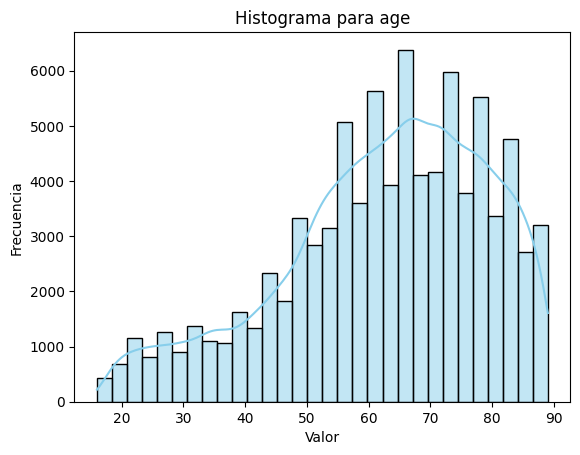

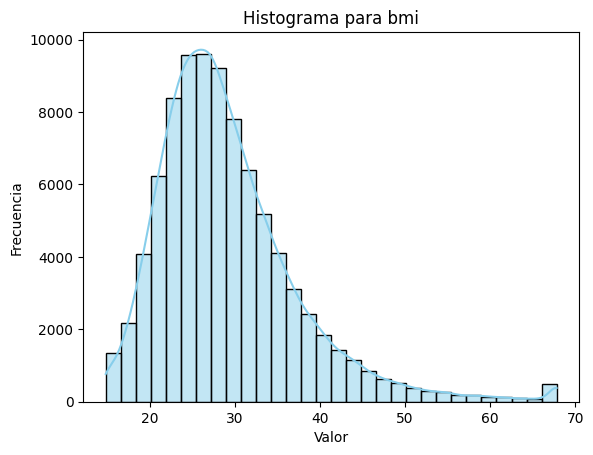

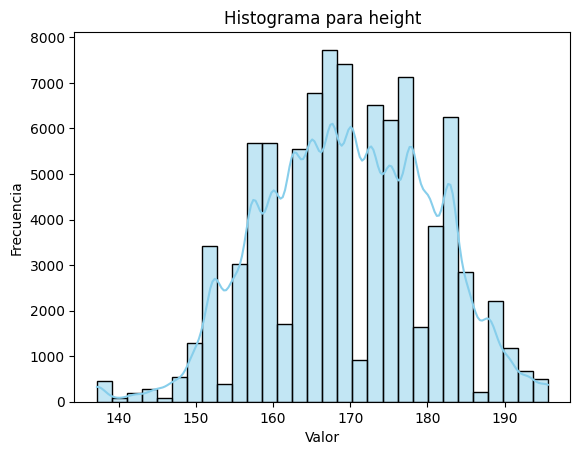

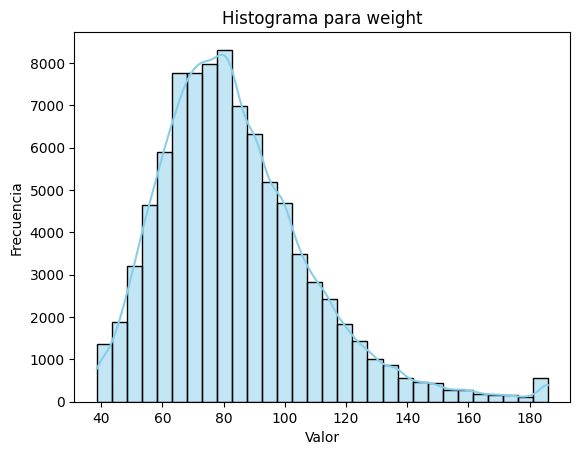

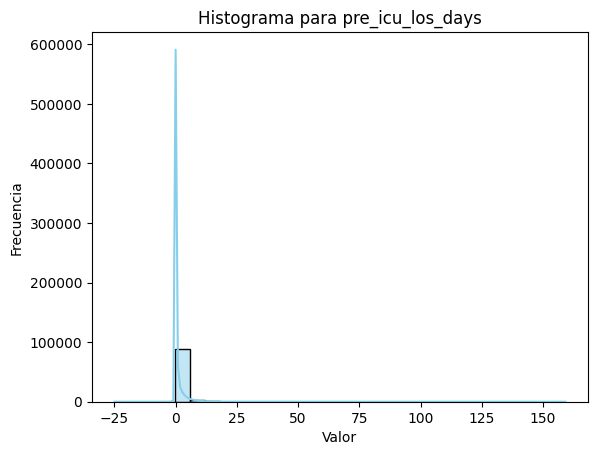

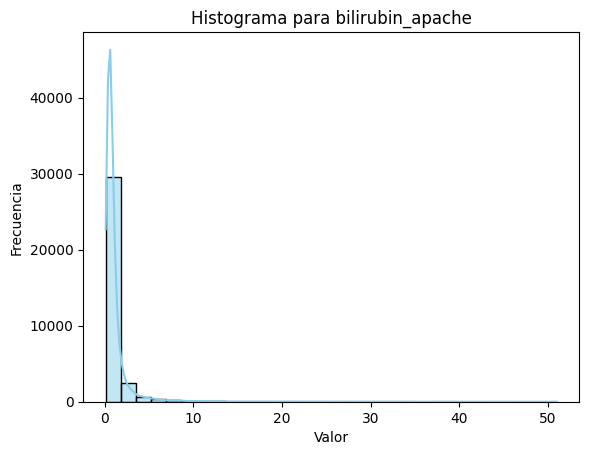

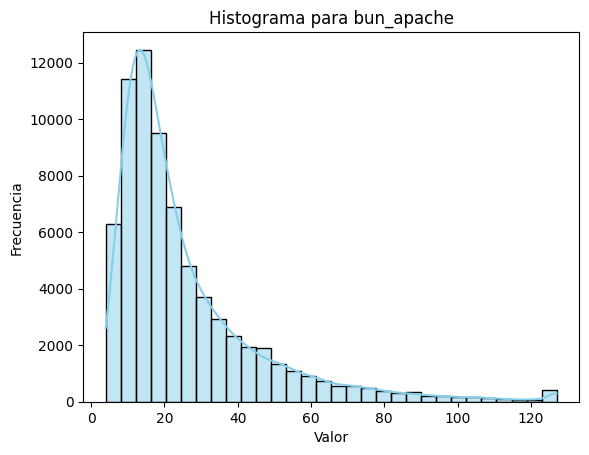

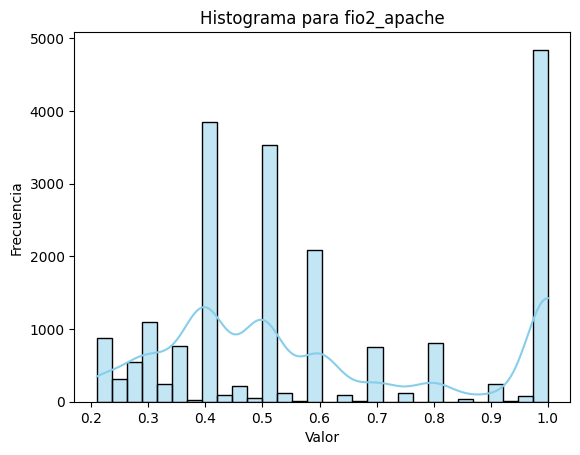

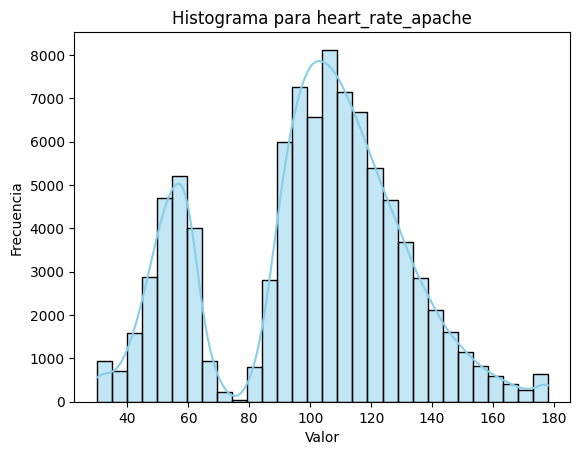

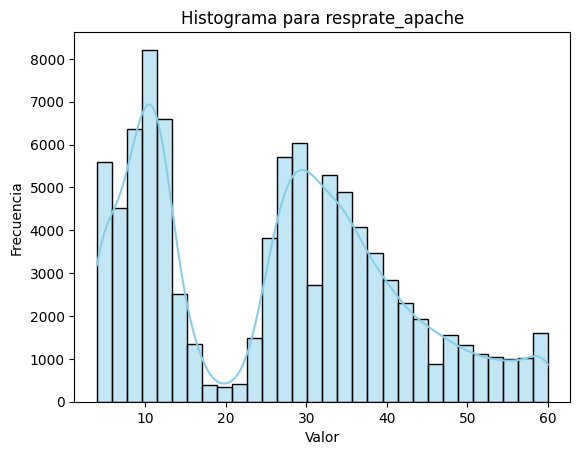

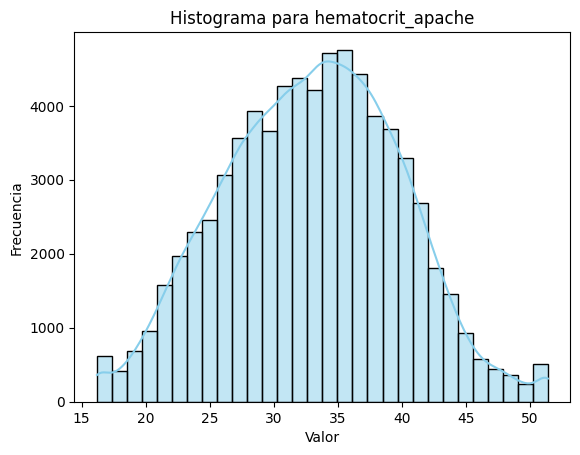

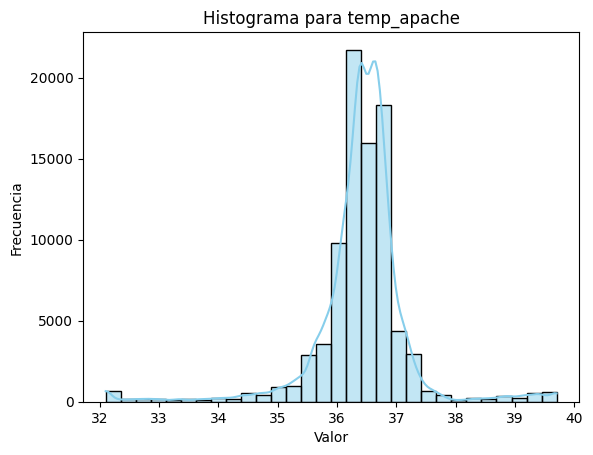

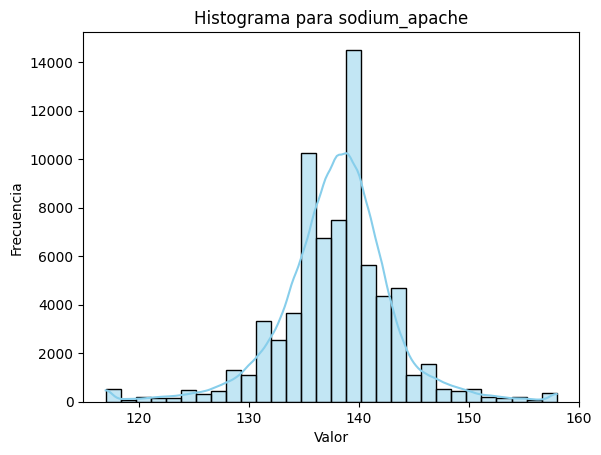

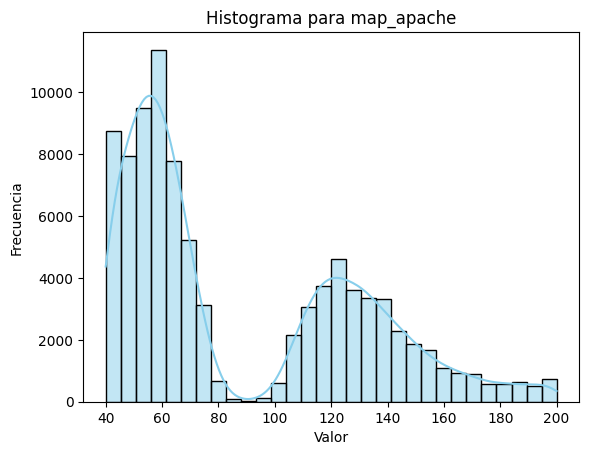

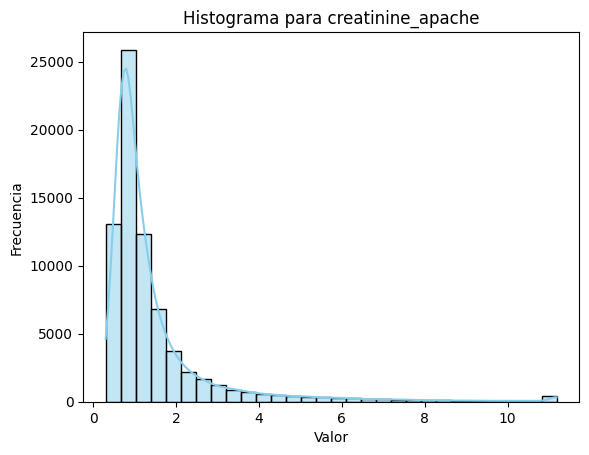

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de los gráficos de densidad separados
for col in df2.columns:
    plt.figure()  # Crear una nueva figura para cada gráfico
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma para {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

1. **age:** Se aprecia una distribución asimétrica a la izquierda. La mayor concentración de pacientes está entre los 60 y 80 años. Se observa una subida progresiva en frecuencia a partir de los 40 años, cuyo punto máximo se encuentra entre los 60 y 70 años, y luego una disminución moderada. La mayoría de pacientes tiene una edad avanzada.

2. **bmi:** Se observa una distribución asimétrica a la derecha, con una alta concentración de valores entre 20 y 30, así como una larga cola hacia la derecha. El punto más alto se encuentra entre 20 y 30, por lo que la mayoría de pacientes tiene sobrepeso.

3. **height:** Se ve una distribución casi normal, con la mayoría de los valores centrados alrededor de los 170 cm, así que la mayoría de pacientes mide alrededor de esta altura. Por ende, presenta una forma simétrica y no se observan valores atípicos extremos.

4. **weight:** Se muestra una distribución asimétrica a la derecha. La mayor concentración de datos está entre los 60kg y 90kg, pero existen algunos valores altos que generan una cola prolongada, lo que indica la presencia de individuos con peso significativamente mayor al promedio.

5. **pre_icu_los_days:** Se expone una distribución asimétrica a la derecha, con una mayor concentración en el valor 0. Esto sugiere que muchos pacientes ingresan directamente a la UCI sin una estancia previa. Algunos pacientes van a UCI después de mucho tiempo, por lo que se extienden una cola. Se observan valores negativos que son errores y se eliminaran posteriormente.

6. **bilirubin_apache:** Se evidencia una distribución asimétrica a la derecha, en la que existe una mayor concentración en el valor o valores cercanos a 0. Sin embargo, hay una cola larga a la derecha que expone la presencia de algunos valores extremos, correspondientes a pacientes con ictericia o falla hepática.

7. **bun_apache:** Se manifiesta una distribución asimétrica a la derecha, de modo que hay una mayor concentración entre 5 y 25, donde también se encuentra el punto máximo. Asimiso, se observa una cola larga hasta valores mayores incluso a 120, lo que indica la presencia de valores altos. Es decir, pacientes con insuficiencia renal severa.

8. **fio2_apache:** Se aprecia una distribución bastante dispersa con picos en valores como 0.4, 0.5 y sobre todo 1.0, de modo que la fracción inspirada de oxígeno es muy variable entre los pacientes. Además, la mayoría de pacientes tenía un soporte ventilatorio máximo.

9. **hearth_rate_apache:** Se muestran dos concentraciones predominantes: una entre 40lpm y 65, así como otra entre 90lpm y 130lpm. Sin embargo, el pico más alto se encuentra entre 100lpm y 120lpm. Por tanto, pocos pacientes presentaban bradicardia severa o taquicardia extrema.

10. **resprate_apache:** Se evidencian dos concentraciones predominantes: una entre 5rpm y 7rpm, así como otra un poco irregular entre 25rpm y 35rpm. El pico más alto está en 10rpm, de modo que la mayoría de pacientes tenía esta frecuencia respiratoria.

11. **hemocrit_apache:** Se observa una distribución bastante simétrica, en la que existe una mayor concentración de fracción de hematocrito entre 27 y 40. Esto refleja que pocos pacientes fueron diagnosticados con anemia severa y hemoconcentración.

12. **temp_apache:** Se manifiesta una distribución simétrica que se concentra entre 35.5°C y 37.5°C, cuyo punto máximo se encuentra entre 36°C y 37°C. Un mayor número de pacientes registraba este intervalo de temperaturas.

13. **sodium_apache:** Se aprecia una distribución simétrica que se concentra entre 135mmol/L y 145mmol/L, cuyo punto máximo se encuentra cercano a 140mmol/L. Esto indica que solo pocos pacientes presentaron hiponatremia o hipernatremia severa.

14. **map_apache:** Se evidencian dos concentraciones predominantes: una entre 50mmHg y 70mmHg, así como otra entre 110mmHg y 140mmHg. El pico más alto está en 60mmHg. Se reconoce que un número considerable de pacientes presentó hipertensión grave.

15. **creatinine_apache:** Se manifiesta una distribución asimétrica a la derecha, de modo que hay una mayor concentración entre 0micromol/L.5micromol/L y 1.5micromol/L, donde también se encuentra el punto máximo aproximadamente en 1micromol/L. Asimiso, se observa una cola larga a la derecha, lo que indica la presencia de valores extremos. En otras palabras, habían pacientes con disfunción renal severa.

#### **Variables categóricas**

In [ ]:
# Filtrar solo las columnas categóricas (incluyendo binarias y codificadas)
cat_cols = df.select_dtypes(include=['object','int64','Int64']).columns

# Sacando de la lista de análisis
# columns id
cat_cols = list(cat_cols)
cat_cols.remove('encounter_id')
cat_cols.remove('patient_id')
cat_cols.remove('hospital_id')
cat_cols.remove('icu_id')

#target
cat_cols.remove('hospital_death')

# columnas numéricas que no son categorías codificadas
cat_cols.remove('age')

cat_cols

['elective_surgery',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'readmission_status',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

Se seleccionaron 15 variables categóricas para el análisis.

In [ ]:
df3=df[['ethnicity','gender','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','intubated_apache','ventilated_apache','aids','cirrhosis','diabetes_mellitus','hepatic_failure']]

In [ ]:
def resumen_categorias(dataframe):
    for col in dataframe.columns:
        total_categorias = len(dataframe[col].unique())
        print(f"Columna: {col}, Total de Categorías: {total_categorias}")

        top_10 = dataframe[col].value_counts().nlargest(10)
        porcentaje_top_10 = dataframe[col].value_counts(normalize=True).nlargest(10)* 100

        tabla_resumen = pd.DataFrame({
            'Categoría': top_10.index,
            'Cantidad': top_10.values,
            'Porcentaje': porcentaje_top_10.values
        })

        print(tabla_resumen)
        print("\n")

resumen_categorias(df3)

Columna: ethnicity, Total de Categorías: 7
          Categoría  Cantidad  Porcentaje
0         Caucasian     70684   78.261255
1  African American      9547   10.570429
2     Other/Unknown      4374    4.842888
3          Hispanic      3796    4.202927
4             Asian      1129    1.250028
5   Native American       788    0.872473


Columna: gender, Total de Categorías: 3
  Categoría  Cantidad  Porcentaje
0         M     49469   53.953625
1         F     42219   46.046375


Columna: hospital_admit_source, Total de Categorías: 16
              Categoría  Cantidad  Porcentaje
0  Emergency Department     36962   52.574533
1        Operating Room      9787   13.920972
2                 Floor      8055   11.457385
3          Direct Admit      6441    9.161641
4         Recovery Room      2896    4.119254
5      Acute Care/Floor      1910    2.716773
6        Other Hospital      1641    2.334149
7  Step-Down Unit (SDU)      1131    1.608728
8                  PACU      1017    1.446575
9



1. **ethnicity:** La variable tiene seis categorías: Caucásico, Afroamericano, Hispano, Asiático, Nativo Americano y Otro/Desconocido. La mayoría de pacientes son caucásicos en un 78% y afroamericanos en un 11%, mientras que el resto tiene una representación considerablemente menor.

2. **gender:** La variable tiene dos categorías: masculino y femenino. La mayoría de pacientes son masculinos en un 54%, mientras que las mujeres representan el 46%.

3. **hospital_admit_source:** La variable  incluye 16 categorías, entre ellas: Departamento de Emergencias, Quirófano, Piso, Ingreso Directo y Sala de Recuperación. La mayoría de los ingresos provienen del Departamento de Emergencias en un 53%, seguido por el Quirófano en un 14%.

4. **icu_admit_source:** La variable tiene seis categorías, siendo las más frecuentes Accidente y Emergencias en un 59% y Quirófano/Recuperación en un 20%. El resto de las fuentes tiene una representación menor.

5. **icu_stay_type:** La variable tiene tres categorías: admisión inicial, transferencia y readmisión. Se observa que predomina la admisión inicial en un 94%, con una menor proporción de transferencias en un 5%.

6. **icu_type:** La variable tiene ocho tipos de unidades. La mayoría de los pacientes ingresaron a una UCI Médico-Quirúrgica con un 55%, seguida por MICU en un 8% y Neuro ICU en un 8% también.

7. **gcs_eyes_apache:** La variable evalúa la respuesta ocular según el índice APACHE. La mayoría de los pacientes registran una puntuación de 4 (Apertura ocular espontánea) en un 70%, seguida por una puntuación de 3 (Apertura ocular al hablarle) en un 15%.

8. **gcs_motor_apache:** La variable mide la respuesta motora. Se aprecia que predomina la puntuación máxima de 6 (Obedece órdenes) en un 79%, seguida por una puntuación de 5 (Localiza el dolor) en un 8.9%.

9. **gcs_verbal_apache:** La variable valora la respuesta verbal. La puntuación más frecuente es 5 (Orientado y conversando) en un 63%, seguida por 1 (No hay respuesta verbal) en un 19%.

10. **intubated_apache:** La variable indica si el paciente fue intubado. El 85% no fue intubado, mientras que el 15% sí lo fue.

11. **ventilated_apache:** La variable registra si el paciente recibió ventilación invasiva. El 67% no fue ventilado, mientras que el 33% sí lo fue.

12. **aids:** La variable indica la presencia de SIDA. Este diagnóstico está ausente en el 99.9% de los casos, con solo un 0.1% de pacientes diagnosticados.

13. **cirrhosis:** La variable señala si el paciente fue diagnosticado con cirrosis. La mayoría, en un 98%, no presenta esta condición; mientras que, un 2% sí.

14. **diabetes_mellitus:** La variable refleja la presencia de diabetes. La mayoría de los pacientes no tiene diabetes en un 77.5%, aunque un 22.5% sí la padecía.

15. **hepatic_failure:** La variable identifica a los pacientes con falla hepática. Este diagnóstico está ausente en el 98.7% de los casos y presente en solo un 1.3%.




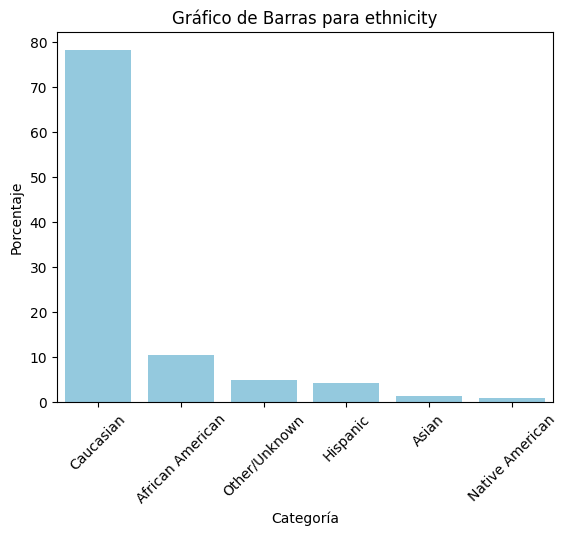

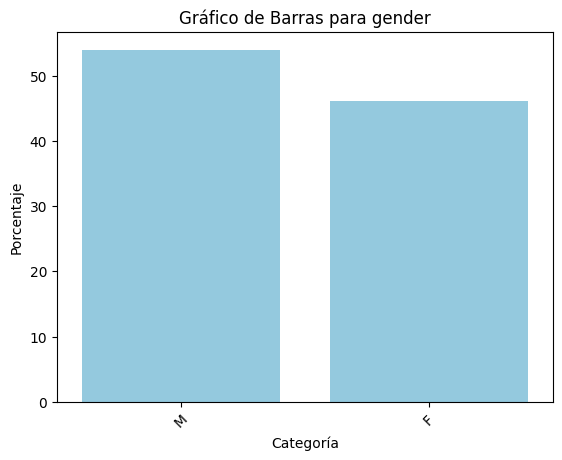

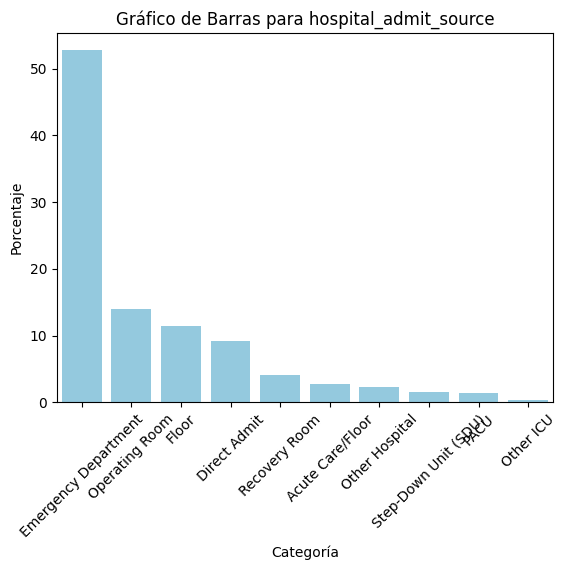

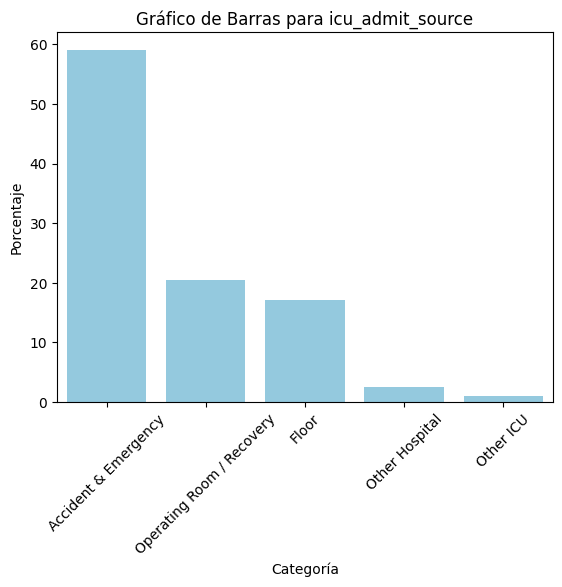

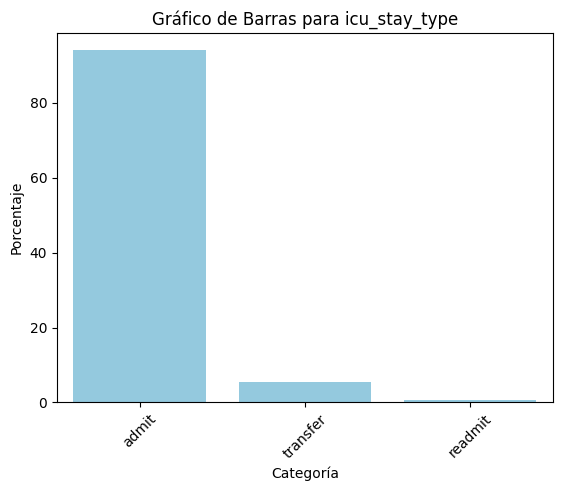

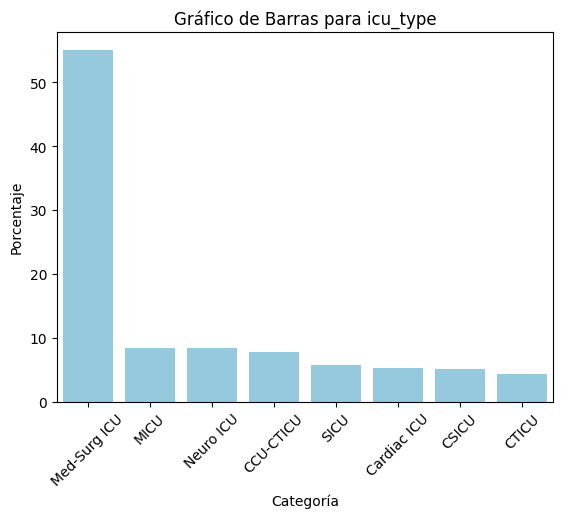

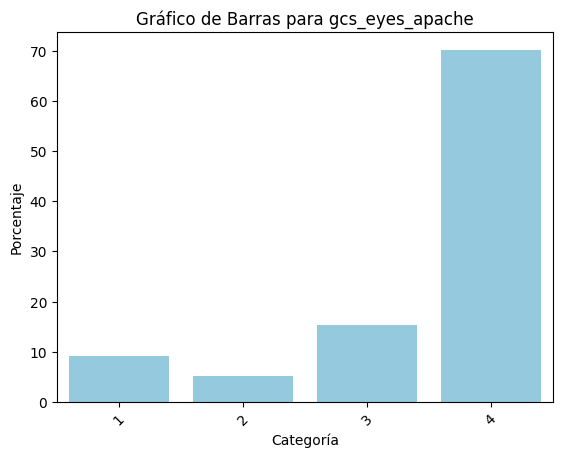

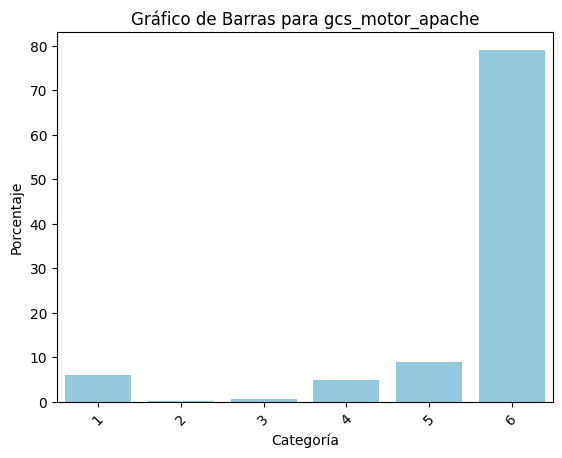

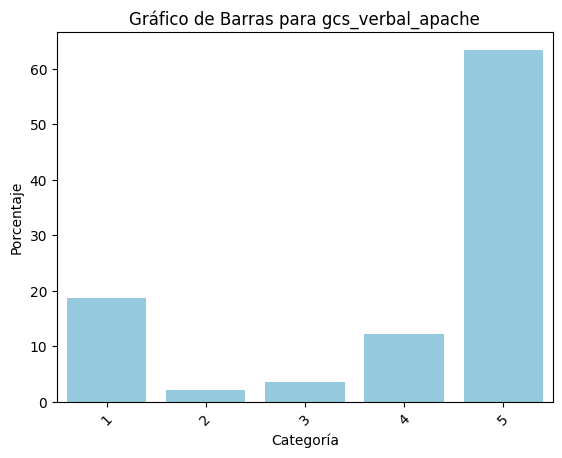

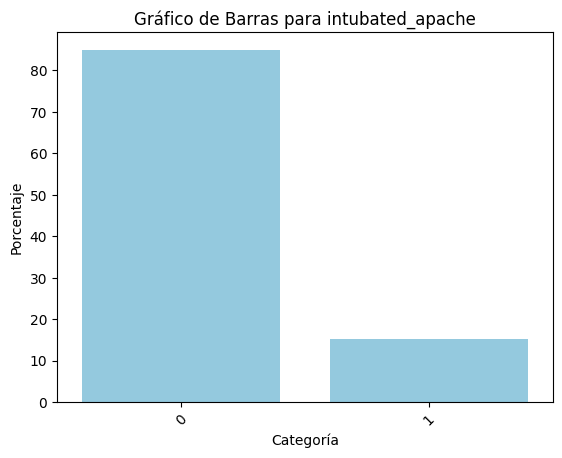

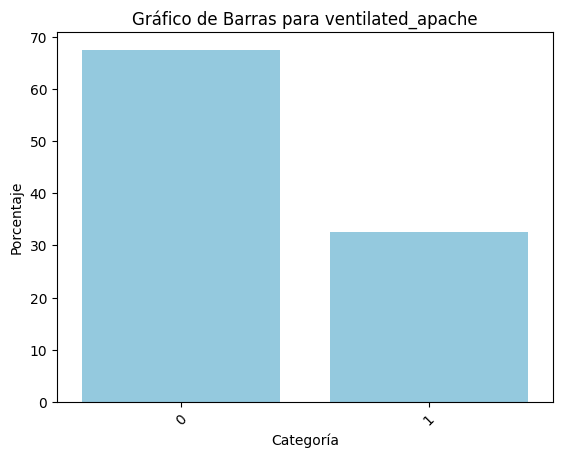

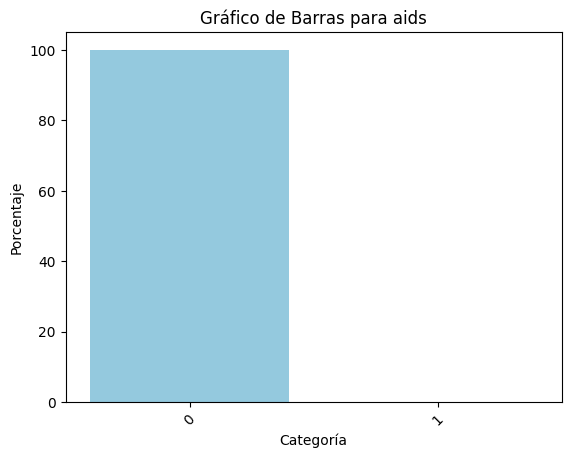

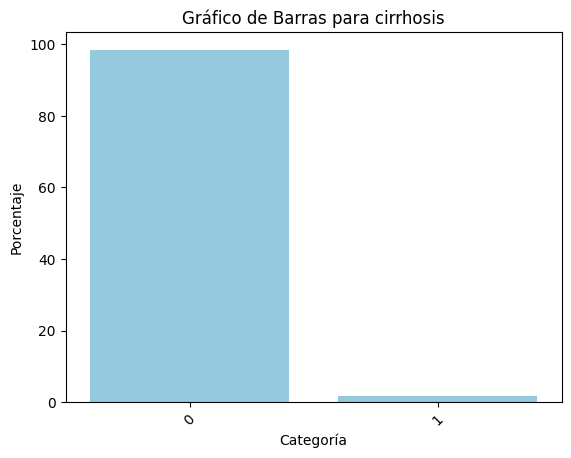

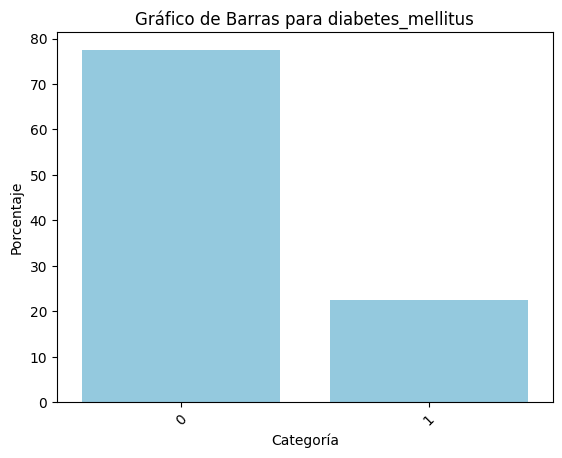

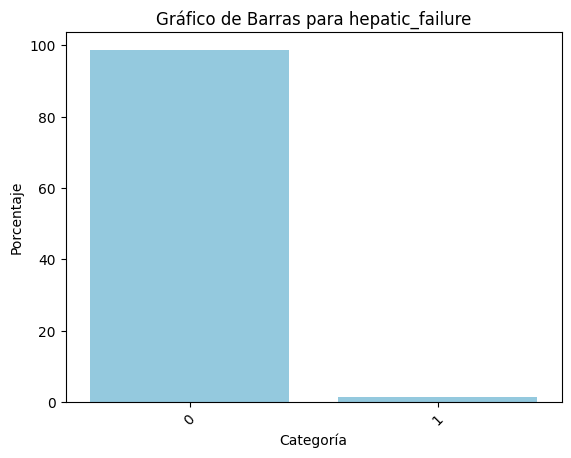

In [ ]:
# Obtener el porcentaje de cada categoría para cada columna categórica
for col in df3:
    plt.figure()  # Crear una nueva figura para cada gráfico
    top_categories = df[col].value_counts().nlargest(10).index
    df_top10 = df[df[col].isin(top_categories)][col]
    sns.barplot(x= df_top10.value_counts(normalize=True).index,
            y=df_top10.value_counts(normalize=True) * 100, color='skyblue')
    plt.title(f'Gráfico de Barras para {col}')
    plt.xlabel('Categoría')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)  # Rotar los nombres de categorías
    plt.show()



1. **ethnicity:** Se muestra un predominio de pacientes caucásicos y, en menor medida, afroamericanos.

2. **gender:** Se observa una distribución relativamente equilibrada, con una ligera mayoría de pacientes masculinos.

3. **hospital_admit_source:** Se destaca el ingreso desde el Departamento de Emergencias.

4. **icu_admit_source:** La mayoría de los ingresos a UCI provienen de Accidentes y Emergencias.

5. **icu_stay_type:** Se observa que predomina la admisión inicial.

6. **icu_type:** La mayoría de los pacientes fueron ingresados a una UCI Médico-Quirúrgica.

7. **gcs_eyes_apache:** La puntuación más frecuente es 4, que indica una buena respuesta ocular en la mayoría de los pacientes.

8. **gcs_motor_apache:** Se muestra un predominio de la máxima puntuación motora 6.

9. **gcs_verbal_apache:** La mayoría de los pacientes obtuvieron la puntuación más alta 5.

10. **intubated_apache:** La gran mayoría de los pacientes no fue intubado.

11. **ventilated_apache:** La mayoría no fue ventilado.

12. **aids:** Solo un número muy pequeño de pacientes tenía SIDA.

13. **cirrhosis:** Muy pocos pacientes presentan cirrosis.

14. **diabetes_mellitus:** Un reducido grupo de pacientes fue diagnosticado con diabetes.

15. **hepatic_failure:** Se observa una baja prevalencia de falla hepática.


### **Análisis de outliers**



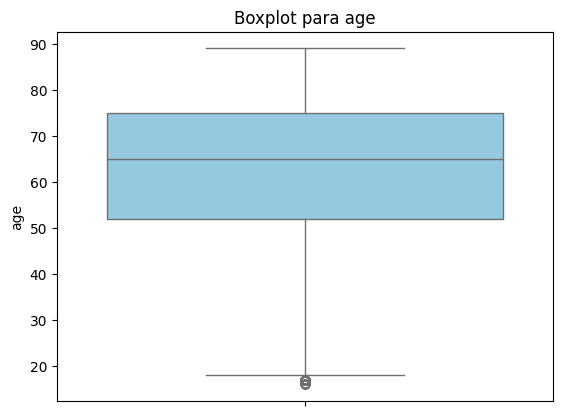

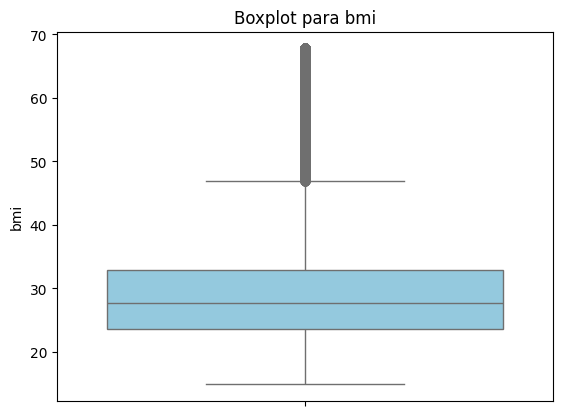

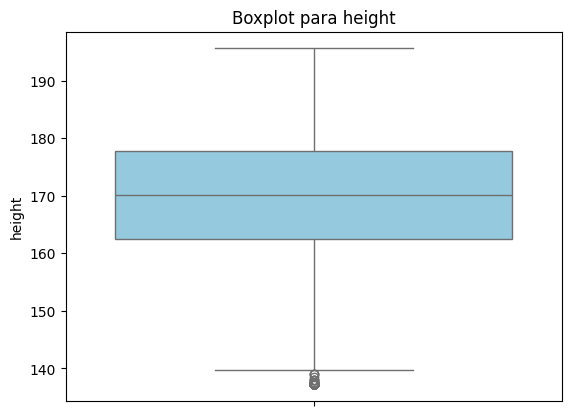

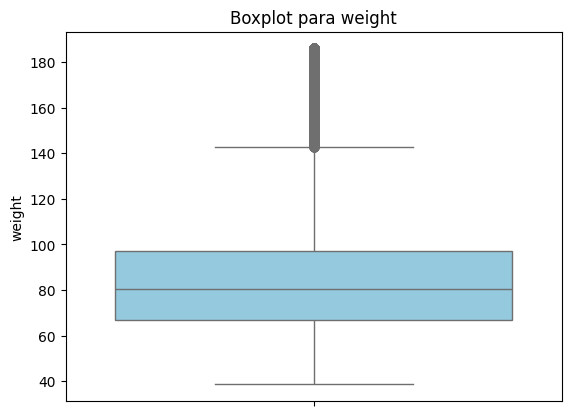

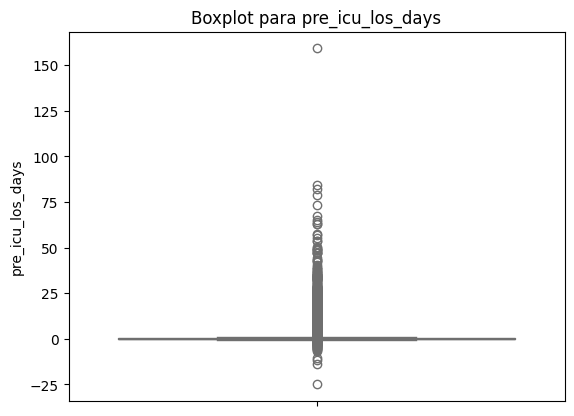

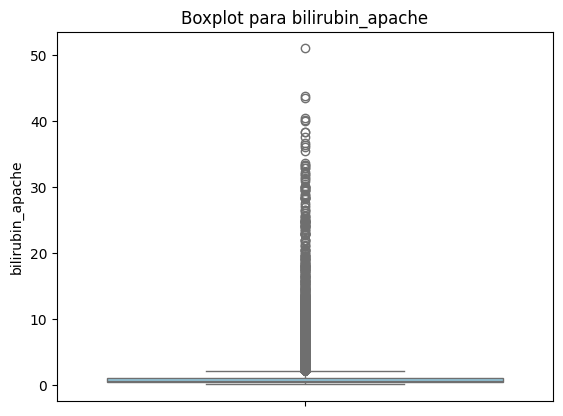

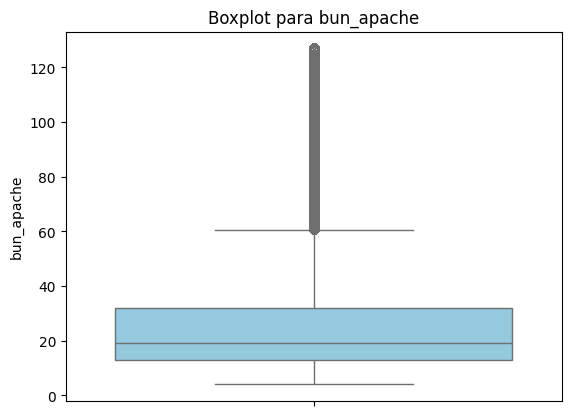

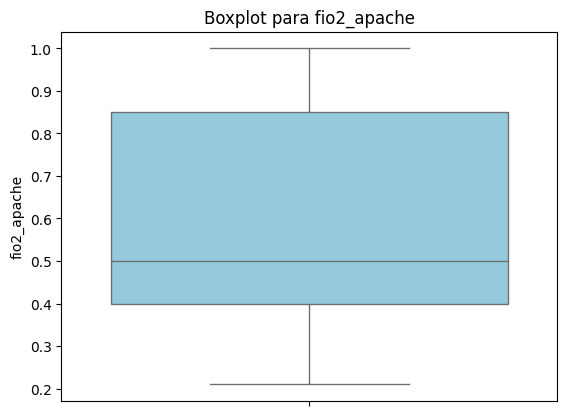

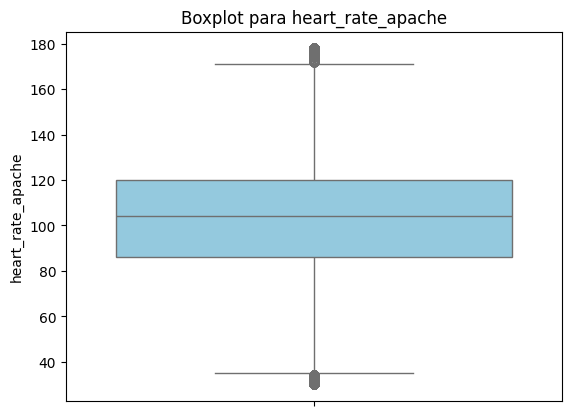

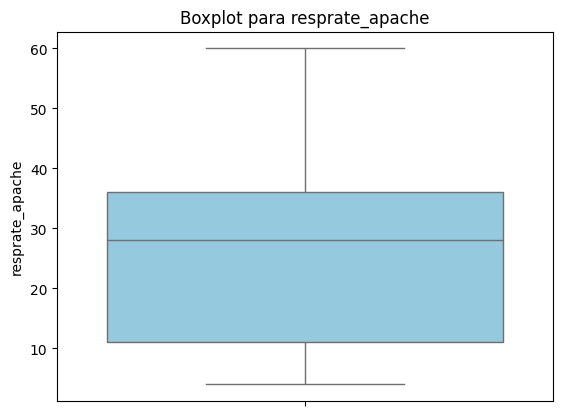

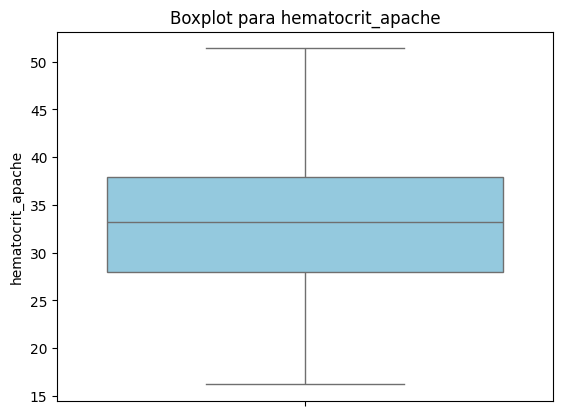

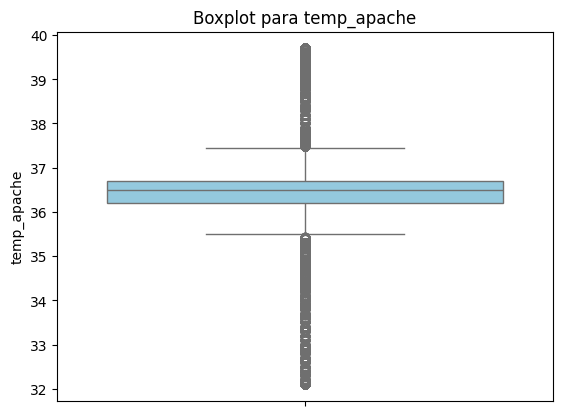

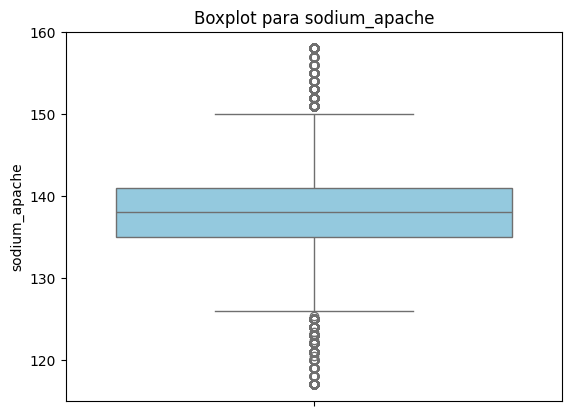

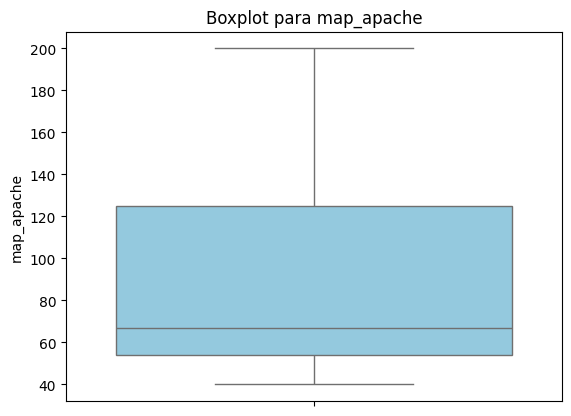

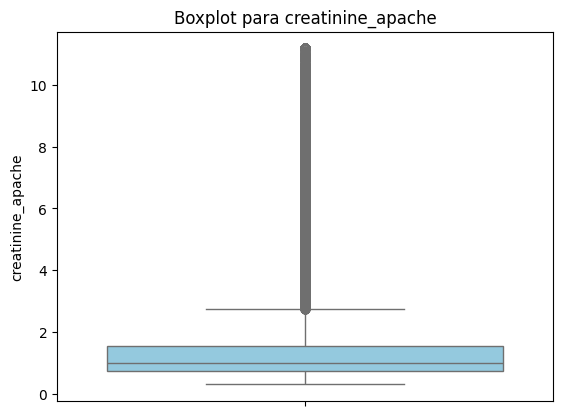

In [ ]:
# Crear un boxplot para 15 variables numéricas
for col in df2.columns:
    plt.figure()  # Crear una nueva figura para cada boxplot
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot para {col}')
    plt.show()

No tiene sentido que **pre_icu_los_days** tenga valores negativos, ya que representa los días de la estancia del paciente entre el ingreso hospitalario y el ingreso a UCI. Por ende, se eliminan los registros cuyo valor de la variable sea menor a 0.

In [ ]:
df['hospital_death'].value_counts() # Se conoce el target

,count
hospital_death,
0,83798
1,7915


In [ ]:
# Eliminar registros donde el valor de 'pre_icu_los_days' es negativo
df=df[df['pre_icu_los_days']>=0]

In [ ]:
df['hospital_death'].value_counts() # No afecta significativamente al target

,count
hospital_death,
0,83045
1,7890


**Conclusión:** A excepción de los outliers negativos de **pre_icu_los_days** que no tenían sentido lógico, el resto de outliers en las variables **age**, **bmi**, **height**, **weight**, **bilirubine_apache**, **bun_apache**, **heart_rate_apache**, **temp_apache**, **sodium_apache** y **creatinine_apache** son valores clínicamente posibles y coherentes. Por consiguiente, se mantienen.

### **Análisis e imputación de valores nulos**

#### **Análisis de valores nulos**

In [ ]:
# Crear una función que nos ayude a determinar el % de nulos por columna

def porcentaje_nulos(dataframe):
    # Calcula el total de valores nulos por columna
    nulos_por_columna = dataframe.isnull().sum()

    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = (nulos_por_columna / len(dataframe)) * 100

    # Combina los resultados en un nuevo dataframe
    resumen_nulos = pd.DataFrame({
        'Columna': nulos_por_columna.index,
        'Valores Nulos': nulos_por_columna.values,
        '% Nulos': porcentaje_nulos.values
    })

    return resumen_nulos

Se ordena de forma descendente para un mejor análisis sobre la cantidad de valores nulos, debido al extenso número de columnas.

In [ ]:
resumen_nulos = porcentaje_nulos(df)
resumen_nulos.sort_values(by='% Nulos', ascending=False) # Se observa que sí hay presencia de valores nulos

,Columna,Valores Nulos,% Nulos
131,h1_bilirubin_min,83887,92.249409
130,h1_bilirubin_max,83887,92.249409
149,h1_lactate_min,83639,91.976687
148,h1_lactate_max,83639,91.976687
128,h1_albumin_max,83098,91.381756
...,...,...,...
13,icu_stay_type,0,0.000000
20,apache_3j_diagnosis,0,0.000000
2,hospital_id,0,0.000000
3,hospital_death,0,0.000000


#### **Eliminación de registros por alta presencia de nulos**

Se observan muchas columnas con un alto porcentaje de valores nulos (mayor a 8% e incluso cercano a 95%). Estas variables corresponden a los resultados de análisis realizados solo en casos clínicos muy específicos, por lo tanto, se decidió no usarlas.

In [ ]:
# Eliminar columnas con valores nulos mayor a 8%
df.drop(columns=resumen_nulos[resumen_nulos['% Nulos'] > 8]['Columna'].tolist(),inplace=True)
print(df.shape)
df

(90935, 79)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68,22.730000,0,Caucasian,M,180.3,...,0,0,1,0,0,0,0,0,Sepsis,Cardiovascular
1,114252,59342,81,0,77,27.420000,0,Caucasian,F,160.0,...,0,0,1,0,0,0,0,0,Respiratory,Respiratory
2,119783,50777,118,0,25,31.950000,0,Caucasian,F,172.7,...,0,0,0,0,0,0,0,0,Metabolic,Metabolic
3,79267,46918,118,0,81,22.640000,1,Caucasian,F,165.1,...,0,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19,NaN,0,Caucasian,M,188.0,...,0,0,0,0,0,0,0,0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75,23.060250,0,Caucasian,M,177.8,...,0,0,1,0,0,0,0,1,Sepsis,Cardiovascular
91709,66119,13486,121,0,56,47.179671,0,Caucasian,F,183.0,...,0,0,0,0,0,0,0,0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48,27.236914,0,Caucasian,M,170.2,...,0,0,1,0,0,0,0,0,Metabolic,Metabolic
91711,33776,120598,66,0,<NA>,23.297481,0,Caucasian,F,154.9,...,0,0,0,0,0,0,0,0,Respiratory,Respiratory


Se analiza nuevamente el porcentaje de nulos por columna.

In [ ]:
resumen_nulos = porcentaje_nulos(df)
resumen_nulos.sort_values(by='% Nulos', ascending=False)

,Columna,Valores Nulos,% Nulos
54,h1_diasbp_noninvasive_min,7272,7.996921
53,h1_diasbp_noninvasive_max,7272,7.996921
66,h1_sysbp_noninvasive_min,7263,7.987024
65,h1_sysbp_noninvasive_max,7263,7.987024
68,d1_glucose_min,5741,6.313301
...,...,...,...
11,icu_id,0,0.000000
19,apache_post_operative,0,0.000000
15,readmission_status,0,0.000000
17,apache_2_diagnosis,0,0.000000


In [ ]:
resumen_nulos.sort_values(by='% Nulos', ascending=False).head(10) # Identificar las columnas que tienen más de 5% de valores nulos

,Columna,Valores Nulos,% Nulos
54,h1_diasbp_noninvasive_min,7272,7.996921
53,h1_diasbp_noninvasive_max,7272,7.996921
66,h1_sysbp_noninvasive_min,7263,7.987024
65,h1_sysbp_noninvasive_max,7263,7.987024
68,d1_glucose_min,5741,6.313301
67,d1_glucose_max,5741,6.313301
58,h1_mbp_min,4565,5.020069
57,h1_mbp_max,4565,5.020069
60,h1_resprate_min,4292,4.719855
59,h1_resprate_max,4292,4.719855


Se observó que varios grupos de columnas que tienen el mismo número de valores nulos y, suponiendo que son los mismos registros sin información, se optó por eliminar los registros con valores nulos en una columna de cada grupo.

In [ ]:
# Eliminar registros con valores nulos
df.dropna(subset=['cirrhosis'],inplace=True)
df.dropna(subset=['apache_2_diagnosis'],inplace=True)
df.dropna(subset=['gcs_eyes_apache'],inplace=True)

In [ ]:
df['hospital_death'].value_counts() # No afecta significativamente al target

,count
hospital_death,
0,81870
1,7572


In [ ]:
resumen_nulos = porcentaje_nulos(df)
resumen_nulos.sort_values(by='% Nulos', ascending=False).head(10) # Identificar las columnas que mantienen más de 5% de valores nulos

,Columna,Valores Nulos,% Nulos
54,h1_diasbp_noninvasive_min,7009,7.836363
53,h1_diasbp_noninvasive_max,7009,7.836363
66,h1_sysbp_noninvasive_min,7001,7.827419
65,h1_sysbp_noninvasive_max,7001,7.827419
68,d1_glucose_min,5630,6.294582
67,d1_glucose_max,5630,6.294582
58,h1_mbp_min,4379,4.895910
57,h1_mbp_max,4379,4.895910
60,h1_resprate_min,4133,4.620872
59,h1_resprate_max,4133,4.620872


**d1_glucose_min**, **d1_glucose_max**, **h1_sysbp_noninvasive_min**, **h1_sysbp_noninvasive_max**, **h1_diasbp_noninvasive_min** y **h1_diasbp_noninvasive_max** son las únicas columnas que mantienen un porcentaje de valores nulos mayor a 5%, por lo que se decidió imputar solo esas columnas y eliminar los registros con valores nulos del resto.

In [ ]:
# Eliminar registros con valores nulos menos los de d1_glucose_max y d1_glucose_min
df.dropna(subset=df.columns.difference(['d1_glucose_max','d1_glucose_min','h1_sysbp_noninvasive_min','h1_sysbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_diasbp_noninvasive_max']),inplace=True)
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68,22.730000,0,Caucasian,M,180.3,...,0,0,1,0,0,0,0,0,Sepsis,Cardiovascular
1,114252,59342,81,0,77,27.420000,0,Caucasian,F,160.0,...,0,0,1,0,0,0,0,0,Respiratory,Respiratory
2,119783,50777,118,0,25,31.950000,0,Caucasian,F,172.7,...,0,0,0,0,0,0,0,0,Metabolic,Metabolic
3,79267,46918,118,0,81,22.640000,1,Caucasian,F,165.1,...,0,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular
5,33181,74489,83,0,67,27.560000,0,Caucasian,M,190.5,...,0,0,1,0,0,0,0,0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,83806,68549,195,0,47,51.439842,1,Caucasian,M,195.0,...,0,0,0,0,0,0,0,0,Gastrointestinal,Gastrointestinal
91706,127138,59223,121,0,54,19.770448,0,Native American,M,177.8,...,0,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular
91708,91592,78108,30,0,75,23.060250,0,Caucasian,M,177.8,...,0,0,1,0,0,0,0,1,Sepsis,Cardiovascular
91709,66119,13486,121,0,56,47.179671,0,Caucasian,F,183.0,...,0,0,0,0,0,0,0,0,Sepsis,Cardiovascular


In [ ]:
df['hospital_death'].value_counts() # No afecta significativamente al target

,count
hospital_death,
0,65697
1,5775


#### **Reemplazo de valores nulos o faltantes**

**d1_glucose_min**, **d1_glucose_max**, **h1_sysbp_noninvasive_min**, **h1_sysbp_noninvasive_max**, **h1_diasbp_noninvasive_min** y **h1_diasbp_noninvasive_max** son variables numéricas; por lo tanto, se reemplazaron los valores nulos por -99999.

In [ ]:
# Reemplazar valores nulos en las columnas
df['d1_glucose_min'].fillna(-99999, inplace=True)
df['d1_glucose_max'].fillna(-99999, inplace=True)
df['h1_sysbp_noninvasive_min'].fillna(-99999, inplace=True)
df['h1_sysbp_noninvasive_max'].fillna(-99999, inplace=True)
df['h1_diasbp_noninvasive_min'].fillna(-99999, inplace=True)
df['h1_diasbp_noninvasive_max'].fillna(-99999, inplace=True)

<ipython-input-59-de272bef1dcc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['d1_glucose_min'].fillna(-99999, inplace=True)
<ipython-input-59-de272bef1dcc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
resumen_nulos = porcentaje_nulos(df)
resumen_nulos.sort_values(by='% Nulos', ascending=False) # Verificar que no hay nulos

,Columna,Valores Nulos,% Nulos
0,encounter_id,0,0.0
1,patient_id,0,0.0
2,hospital_id,0,0.0
3,hospital_death,0,0.0
4,age,0,0.0
...,...,...,...
74,leukemia,0,0.0
75,lymphoma,0,0.0
76,solid_tumor_with_metastasis,0,0.0
77,apache_3j_bodysystem,0,0.0


## **MODELO DE PREDICCIÓN**

**CASO DE NEGOCIO:** Se nos contacta porque el hospital necesita reducir la mortalidad en la Unidad de Cuidados Intensivo (UCI). Quieren identificar con mayor precisión a los pacientes con riesgo de fallecer para priorizar recursos y tomar decisiones clínicas más oportunas.

### **Metodología CRISP-DM**

#### **Comprensión del Negocio**



*   **Objetivo de negocio:** Reducir la mortalidad hospitalaria en la Unidad de Cuidados Intensivos (UCI)
*   **¿Cómo quieren usar la solución?:** Apoyo a la toma de decisiones clínicas durante las primeras 24 horas de hospitalización en UCI
* **Más información:** Actualmente, se toman decisiones según criterios médicos generales, pero se busca identificar con mayor precisión qué pacientes tienen mayor riesgo de fallecer para priorizar intervenciones y recursos
*   **¿Cómo los ayudamos?:** Ayudaremos a predecir la supervivencia de pacientes con datos de las primeras 24 horas de hospitalización en UCI, registrados a lo largo de un año



#### **Compresión de los Datos**

##### **Definición de población objetivo y espacio temporal**

La población son los pacientes hospizalizados en la Unidad de Cuidados Intensivos (UCI) y el espacio temporal de análisis serán las primeras 24 horas en cuidados intensivos, ya que se necesita hacer la predicción en el primer día que un paciente ingresa a UCI

In [ ]:
# La población son los pacientes, ya que se evaluará su supervivencia
N_total = df['patient_id'].nunique()
print(f'Tamaño de la poblacion de pacientes: {N_total}')

Tamaño de la poblacion de pacientes: 71472


##### **Análisis de indicadores importantes para el negocio**



*   Tasa de mortalidad hospitalaria anual



In [ ]:
import pandas as pd

tasa_mortalidad = pd.DataFrame({
    'Count': df['hospital_death'].value_counts(),
    'Percentage': df['hospital_death'].value_counts(normalize=True) * 100
})

tasa_mortalidad

##### **Definición del target**

**Modelo:** Predicción de la supervivencia de pacientes en UCI en las primeras 24 horas

In [ ]:
# El target es la muerte hospitalaria
df['hospital_death'].value_counts()

,count
hospital_death,
0,65697
1,5775


#### **Preparación de los Datos**

##### **Conversión de variables categóricas a numéricas**

In [ ]:
# Filtrar solo las columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# Sacando de la lista de análisis
# columns id
cat_cols = list(cat_cols)
cat_cols.remove('encounter_id')
cat_cols.remove('patient_id')
cat_cols.remove('hospital_id')
cat_cols.remove('icu_id')

cat_cols

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [ ]:
# Analizando las categorías de las variables categóricas:
for col in cat_cols:
  print(col)
  print(list(df[col].value_counts().index))
  print('\n')

ethnicity
['Caucasian', 'African American', 'Other/Unknown', 'Hispanic', 'Asian', 'Native American']


gender
['M', 'F']


icu_admit_source
['Accident & Emergency', 'Operating Room / Recovery', 'Floor', 'Other Hospital', 'Other ICU']


icu_stay_type
['admit', 'transfer', 'readmit']


icu_type
['Med-Surg ICU', 'MICU', 'Neuro ICU', 'CCU-CTICU', 'SICU', 'CSICU', 'Cardiac ICU', 'CTICU']


apache_2_diagnosis
['113', '301', '302', '112', '308', '124', '122', '117', '303', '110', '304', '202', '106', '203', '305', '121', '123', '114', '102', '307', '119', '120', '118', '108', '214', '105', '109', '213', '306', '207', '218', '209', '219', '217', '101', '104', '103', '115', '107', '116', '215', '208', '212', '216']


apache_3j_diagnosis
['501.05', '107.01', '403.01', '106.01', '703.03', '104.01', '502.01', '1207.01', '702.01', '102.01', '206.01', '212.01', '1206.03', '305.02', '501.02', '111.01', '407.01', '410.01', '401.01', '901.03', '501.06', '306.01', '203.01', '207.01', '501.01', '108.01',

In [ ]:
# Transformando la variables categóricas a numéricas
categorias = {
    'ethnicity':['Caucasian','African American','Hispanic','Other/Unknown'],
    'gender':['M','F'],
    'icu_admit_source':['Accident & Emergency', 'Operating Room / Recovery', 'Floor', 'Other Hospital'],
    'icu_stay_type':['admit','transfer','readmit'],
    'icu_type':['Med-Surg ICU', 'MICU', 'Neuro ICU', 'CCU-CTICU', 'SICU'],
    'apache_2_diagnosis': ['113', '301', '302', '112', '308'],
    'apache_3j_diagnosis': ['501.05', '107.01', '403.01', '106.01', '703.03'],
    'apache_2_bodysystem': ['Cardiovascular', 'Neurologic', 'Respiratory', 'Gastrointestinal', 'Metabolic'],
    'apache_3j_bodysystem': ['Cardiovascular', 'Neurological', 'Sepsis', 'Respiratory', 'Gastrointestinal']
}

df_final = df.copy()

# Función para reemplazar valores no en la lista por 'OTROS'
def reemplazar_categorias(valor, categorias):
    return valor if valor in categorias else 'OTROS'

for col, categorias_interes in categorias.items():
  # Reemplazar los valores diferentes de la lista de categorias por OTROS
  df[col] = df[col].apply(reemplazar_categorias,categorias=categorias_interes)

  # Agregar la categoría OTROS  a la lista:
  categorias_interes = categorias_interes + ['OTROS']

  # Obtener variables dummy solo para las categorías de interés
  dummy_df = pd.get_dummies(df_final[col][df_final[col].isin(categorias_interes)],prefix=col, dtype='Int64')

  # Agregar las variables dummy al DataFrame original
  df_final = pd.concat([df_final, dummy_df], axis=1)

  # Eliminar la columna original de la variable categórica
  df_final = df_final.drop(col, axis=1)

df_final.fillna(0, inplace=True)

In [ ]:
# Eliminar de la variable gender_M
df_final.drop(columns=['gender_M'], inplace=True)

# Cambiar de nombre a la variable gender_F
df_final.rename(columns={'gender_F': 'gender'}, inplace=True)

In [ ]:
# Mostrar el DataFrame resultante
df_final.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Respiratory,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis
0,66154,25312,118,0,68,22.73,0,180.3,92,0.541667,...,1,0,0,0,0,0,0,0,0,1
1,114252,59342,81,0,77,27.42,0,160.0,90,0.927778,...,0,0,0,0,1,0,0,0,1,0
2,119783,50777,118,0,25,31.95,0,172.7,93,0.000694,...,0,0,1,0,0,0,0,0,0,0
3,79267,46918,118,0,81,22.64,1,165.1,92,0.000694,...,1,0,0,0,0,1,0,0,0,0
5,33181,74489,83,0,67,27.56,0,190.5,95,0.000694,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71472 entries, 0 to 91712
Columns: 107 entries, encounter_id to apache_3j_bodysystem_Sepsis
dtypes: Int64(53), float64(46), int64(4), object(4)
memory usage: 64.5+ MB


#### **Modelamiento**

In [ ]:
vars_predict = list(df_final.columns)
vars_predict.remove('hospital_death')
vars_predict.remove('encounter_id')
vars_predict.remove('patient_id')
vars_predict.remove('hospital_id')
vars_predict.remove('icu_id')
vars_predict

['age',
 'bmi',
 'elective_surgery',
 'height',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min

##### **Regresión logística**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

X = df_final[vars_predict]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Estandarizar variables predictoras
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar oversampling solo al conjunto de entrenamiento
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Inicializar el modelo de regresión logística
modelo_logistic = LogisticRegression(max_iter=1000, solver='liblinear')

# Entrenar el modelo
modelo_logistic.fit(X_train_resampled, y_train_resampled)

# Predecir probabilidades en el conjunto de prueba
y_prob_logistic = modelo_logistic.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de regresión logística en el conjunto de prueba original usando AUC
auc_logistic = roc_auc_score(y_test, y_prob_logistic)
print(f'AUC Regresión Logística con Oversampling: {auc_logistic:.4f}')

# Predecir en el conjunto de prueba
y_pred_logistic = modelo_logistic.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Matriz de Confusión:")
print(conf_matrix_logistic)

# Calcular y mostrar la precisión (accuracy)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Precisión de Regresión Logística con Oversampling: {accuracy_logistic:.4f}')

Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC Regresión Logística con Oversampling: 0.8657
Matriz de Confusión:
[[10538  2602]
 [  276   879]]
Precisión de Regresión Logística con Oversampling: 0.7987


##### **Árbol de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df_final[vars_predict]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Definir los espacios de búsqueda de hiperparámetros para el árbol de decisión
param_dist_decision_tree = {
    'max_depth': randint(3, 10),           # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),    # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 20),     # Mínimo de muestras en una hoja
}

# Inicializar el modelo de árbol de decisión
modelo_decision_tree = DecisionTreeClassifier(random_state=42)

# Realizar la búsqueda aleatoria para el árbol de decisión en el conjunto de entrenamiento oversampleado
random_search_decision_tree = RandomizedSearchCV(modelo_decision_tree, param_distributions=param_dist_decision_tree, n_iter=2, cv=3, scoring='roc_auc', random_state=42)
random_search_decision_tree.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo de árbol de decisión
mejor_modelo_decision_tree = random_search_decision_tree.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob_decision_tree = mejor_modelo_decision_tree.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de árbol de decisión en el conjunto de prueba original usando AUC
auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
print(f'AUC Árbol de Decisión con Optimización y Oversampling: {auc_decision_tree:.4f}')

# Predecir en el conjunto de prueba
y_pred_decision_tree = mejor_modelo_decision_tree.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("Matriz de Confusión:")
print(conf_matrix_decision_tree)

# Calcular y mostrar la precisión (accuracy)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f'Precisión Árbol de Decisión con Optimización y Oversampling: {accuracy_decision_tree:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros Árbol de Decisión:", random_search_decision_tree.best_params_)

Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC Árbol de Decisión con Optimización y Oversampling: 0.7871
Matriz de Confusión:
[[10057  3083]
 [  341   814]]
Precisión Árbol de Decisión con Optimización y Oversampling: 0.7605
Mejores hiperparámetros Árbol de Decisión: {'max_depth': 9, 'min_samples_leaf': 15, 'min_samples_split': 12}


##### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df_final[vars_predict]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Definir los espacios de búsqueda de hiperparámetros para Random Forest
param_dist_random_forest = {
    'n_estimators': randint(50, 200),          # Número de árboles en el bosque
    'max_depth': randint(3, 10),               # Profundidad máxima de cada árbol
    'min_samples_split': randint(2, 20),       # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 20),        # Mínimo de muestras en una hoja
}

# Inicializar el modelo de Random Forest
modelo_random_forest = RandomForestClassifier(random_state=42)

# Realizar la búsqueda aleatoria para Random Forest en el conjunto de entrenamiento oversampleado
random_search_random_forest = RandomizedSearchCV(modelo_random_forest, param_distributions=param_dist_random_forest, n_iter=2, cv=3, scoring='roc_auc', random_state=42)
random_search_random_forest.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo de Random Forest
mejor_modelo_random_forest = random_search_random_forest.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob_random_forest = mejor_modelo_random_forest.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de Random Forest en el conjunto de prueba original usando AUC
auc_random_forest = roc_auc_score(y_test, y_prob_random_forest)
print(f'AUC Random Forest con Optimización y Oversampling: {auc_random_forest:.4f}')

# Predecir en el conjunto de prueba
y_pred_random_forest = mejor_modelo_random_forest.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print("Matriz de Confusión para Random Forest:")
print(conf_matrix_random_forest)

# Calcular y mostrar la precisión (accuracy)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f'Precisión Random Forest con Optimización y Oversampling: {accuracy_random_forest:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros Random Forest:", random_search_random_forest.best_params_)

Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC Random Forest con Optimización y Oversampling: 0.8594
Matriz de Confusión para Random Forest:
[[10925  2215]
 [  341   814]]
Precisión Random Forest con Optimización y Oversampling: 0.8212
Mejores hiperparámetros Random Forest: {'max_depth': 9, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 121}


##### **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df_final[vars_predict]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Definir los espacios de búsqueda de hiperparámetros para XGBoost
param_dist_xgboost = {
    'n_estimators': randint(50, 200),      # Número de árboles
    'max_depth': randint(3, 10),           # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],         # Proporción de muestras utilizadas para entrenar cada árbol
    'min_child_weight': randint(1, 10),    # Peso mínimo de las muestras en cada hoja
}

# Inicializar el modelo de XGBoost
modelo_xgboost = xgb.XGBClassifier(random_state=42)

# Realizar la búsqueda aleatoria para XGBoost en el conjunto de entrenamiento oversampleado
random_search_xgboost = RandomizedSearchCV(modelo_xgboost, param_distributions=param_dist_xgboost, n_iter=2, cv=3, scoring='roc_auc', random_state=42)
random_search_xgboost.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo de XGBoost
mejor_modelo_xgboost = random_search_xgboost.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob_xgboost = mejor_modelo_xgboost.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de XGBoost en el conjunto de prueba original usando AUC
auc_xgboost = roc_auc_score(y_test, y_prob_xgboost)
print(f'AUC XGBoost con Optimización y Oversampling: {auc_xgboost:.4f}')

# Predecir en el conjunto de prueba
y_pred_xgboost = mejor_modelo_xgboost.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print("Matriz de Confusión para XGBoost:")
print(conf_matrix_xgboost)

# Calcular y mostrar la precisión (accuracy)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Precisión XGBoost con Optimización y Oversampling: {accuracy_xgboost:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros XGBoost:", random_search_xgboost.best_params_)

Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC XGBoost con Optimización y Oversampling: 0.8678
Matriz de Confusión para XGBoost:
[[11294  1846]
 [  361   794]]
Precisión XGBoost con Optimización y Oversampling: 0.8456
Mejores hiperparámetros XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 70, 'subsample': 1.0}


##### **CatBoost**

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df_final[vars_predict]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Definir los espacios de búsqueda de hiperparámetros para CatBoost
param_dist_catboost = {
    'iterations': randint(50, 200),       # Número de iteraciones (árboles)
    'depth': randint(3, 10),              # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],         # Proporción de muestras utilizadas para entrenar cada árbol
    'min_child_samples': randint(1, 10),   # Mínimo de muestras en cada hoja
}

# Inicializar el modelo de CatBoost
modelo_catboost = CatBoostClassifier(random_state=42, verbose=0)

# Realizar la búsqueda aleatoria para CatBoost en el conjunto de entrenamiento oversampleado
random_search_catboost = RandomizedSearchCV(modelo_catboost, param_distributions=param_dist_catboost, n_iter=2, cv=3, scoring='roc_auc', random_state=42)
random_search_catboost.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo de CatBoost
mejor_modelo_catboost = random_search_catboost.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob_catboost = mejor_modelo_catboost.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de CatBoost en el conjunto de prueba original usando AUC
auc_catboost = roc_auc_score(y_test, y_prob_catboost)
print(f'AUC CatBoost con Optimización y Oversampling: {auc_catboost:.4f}')

# Predecir en el conjunto de prueba
y_pred_catboost = mejor_modelo_catboost.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Matriz de Confusión para CatBoost:")
print(conf_matrix_catboost)

# Calcular y mostrar la precisión (accuracy)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'Precisión CatBoost con Optimización y Oversampling: {accuracy_catboost:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros CatBoost:", random_search_catboost.best_params_)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC CatBoost con Optimización y Oversampling: 0.8505
Matriz de Confusión para CatBoost:
[[12117  1023]
 [  562   593]]
Precisión CatBoost con Optimización y Oversampling: 0.8891
Mejores hiperparámetros CatBoost: {'depth': 9, 'iterations': 142, 'learning_rate': 0.2, 'min_child_samples': 8, 'subsample': 0.8}


##### **Comparación de Algoritmos**

**Conclusión:**
- AUC Regresión logística con Optimización y Oversampling: 0.8657
- AUC Árbol de Decisión con Optimización y Oversampling: 0.7871
- AUC Random Forest con Optimización y Oversampling: 0.8594
- AUC XGBoost con Optimización y Oversampling: 0.8678
- AUC CatBoost con Optimización y Oversampling: 0.8505

**Entonces, gana el modelo de XGBoost.**

##### **Análisis de variables más importantes**

In [ ]:
# Obtener importancias de características y árboles individuales
importancias_variables_rf = mejor_modelo_xgboost.feature_importances_

# Obtener nombres de columnas
nombres_variables = X.columns

# Crear un DataFrame con las importancias y gain
df_importancias = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancias_variables_rf})
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Calcular el porcentaje acumulado de importancia
df_importancias['Porcentaje Acumulado'] = df_importancias['Importancia'].cumsum() * 100

df_importancias

,Variable,Importancia,Porcentaje Acumulado
18,ventilated_apache,0.231750,23.174957
2,elective_surgery,0.072048,30.379768
10,gcs_motor_apache,0.038100,34.189762
12,gcs_verbal_apache,0.030896,37.279381
34,d1_sysbp_min,0.025144,39.793819
...,...,...,...
88,apache_3j_diagnosis_107.01,0.000000,99.999977
98,apache_3j_bodysystem_Gastrointestinal,0.000000,99.999977
99,apache_3j_bodysystem_Neurological,0.000000,99.999977
100,apache_3j_bodysystem_Respiratory,0.000000,99.999977


##### **Análisis de correlación de variables**

In [ ]:
import pandas as pd
import numpy as np

def eliminar_variables_correlacionadas(df, umbral_correlacion=0.65, seed=None):
    """
    Analiza la correlación entre variables en un DataFrame.
    Elimina una de las variables en cada par correlacionado y devuelve la lista final de variables.

    Parameters:
    - df (pd.DataFrame): DataFrame con las variables.
    - umbral_correlacion (float): Umbral de correlación para considerar variables correlacionadas.
    - seed (int): Semilla para reproducibilidad.

    Returns:
    - Lista final de variables sin correlación.
    """
    # Calcula la matriz de correlación
    matriz_correlacion = df.corr().abs()

    # Encuentra las variables correlacionadas
    variables_correlacionadas = []
    for i in range(len(matriz_correlacion.columns)):
        for j in range(i):
            if matriz_correlacion.iloc[i, j] > umbral_correlacion:
                variables_correlacionadas.append((matriz_correlacion.columns[i], matriz_correlacion.columns[j]))

    # Elimina una variable de cada par correlacionado
    variables_a_eliminar = set()
    np.random.seed(seed)
    for par in variables_correlacionadas:
        variable_a_eliminar = np.random.choice(par)
        variables_a_eliminar.add(variable_a_eliminar)

    # Crea la lista final de variables sin correlación
    variables_sin_correlacion = list(set(df.columns) - variables_a_eliminar)

    return variables_sin_correlacion, variables_correlacionadas

variables_sin_correlacion,variables_correlacionadas = eliminar_variables_correlacionadas(df_final[vars_predict], seed=42)
print("Cantidad de variables inicial:", len(vars_predict))
print("Cantidad de variables sin correlación:", len(variables_sin_correlacion))
print("variables correlacionadas:", variables_correlacionadas)
print("Variables sin correlación:", variables_sin_correlacion)

Cantidad de variables inicial: 102
Cantidad de variables sin correlación: 61
variables correlacionadas: [('weight', 'bmi'), ('apache_post_operative', 'elective_surgery'), ('gcs_motor_apache', 'gcs_eyes_apache'), ('gcs_verbal_apache', 'gcs_eyes_apache'), ('gcs_verbal_apache', 'gcs_motor_apache'), ('d1_diasbp_noninvasive_max', 'd1_diasbp_max'), ('d1_diasbp_noninvasive_min', 'd1_diasbp_min'), ('d1_heartrate_max', 'heart_rate_apache'), ('d1_mbp_max', 'd1_diasbp_max'), ('d1_mbp_max', 'd1_diasbp_noninvasive_max'), ('d1_mbp_min', 'd1_diasbp_min'), ('d1_mbp_min', 'd1_diasbp_noninvasive_min'), ('d1_mbp_noninvasive_max', 'd1_diasbp_max'), ('d1_mbp_noninvasive_max', 'd1_diasbp_noninvasive_max'), ('d1_mbp_noninvasive_max', 'd1_mbp_max'), ('d1_mbp_noninvasive_min', 'd1_diasbp_min'), ('d1_mbp_noninvasive_min', 'd1_diasbp_noninvasive_min'), ('d1_mbp_noninvasive_min', 'd1_mbp_min'), ('d1_sysbp_max', 'd1_mbp_max'), ('d1_sysbp_max', 'd1_mbp_noninvasive_max'), ('d1_sysbp_min', 'd1_diasbp_min'), ('d1_sysb

##### **Definición de variables finales**

In [ ]:
# Seleccionando a las vars con 95% de la importancia total
vars_95 = df_importancias[df_importancias['Porcentaje Acumulado']<=95.1]['Variable']
lista_vars_95 = list(vars_95)
print('cantidad de vars finales por importancia',len(lista_vars_95))
lista_vars_95

cantidad de vars finales por importancia 76


['ventilated_apache',
 'elective_surgery',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'd1_sysbp_min',
 'apache_3j_bodysystem_Cardiovascular',
 'apache_3j_diagnosis_703.03',
 'apache_2_bodysystem_Metabolic',
 'icu_admit_source_Operating Room / Recovery',
 'gcs_eyes_apache',
 'd1_spo2_min',
 'solid_tumor_with_metastasis',
 'age',
 'd1_sysbp_noninvasive_min',
 'intubated_apache',
 'apache_2_diagnosis_308',
 'apache_2_diagnosis_113',
 'd1_resprate_max',
 'd1_temp_min',
 'd1_mbp_min',
 'cirrhosis',
 'd1_heartrate_max',
 'hepatic_failure',
 'icu_admit_source_Other Hospital',
 'pre_icu_los_days',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Neurologic',
 'h1_sysbp_min',
 'apache_2_diagnosis_112',
 'resprate_apache',
 'apache_post_operative',
 'd1_heartrate_min',
 'immunosuppression',
 'd1_sysbp_noninvasive_max',
 'apache_3j_diagnosis_403.01',
 'arf_apache',
 'temp_apache',
 'h1_resprate_min',
 'apache_2_diagnosis_301',
 'd1_resprate_min',
 'icu_type_MICU',
 'apache_2_diagno

In [ ]:
# Generando una lista final cruzando las vars seleccionadas por la importancia con las finalistas luego de la correlación
vars_finales = list(set(vars_95).intersection(variables_sin_correlacion))
print('cantidad de vars finales',len(vars_finales))
vars_finales

cantidad de vars finales 45


['apache_2_bodysystem_Metabolic',
 'gcs_eyes_apache',
 'leukemia',
 'apache_3j_diagnosis_703.03',
 'apache_2_diagnosis_308',
 'icu_admit_source_Accident & Emergency',
 'd1_resprate_min',
 'h1_diasbp_noninvasive_min',
 'solid_tumor_with_metastasis',
 'arf_apache',
 'icu_admit_source_Other Hospital',
 'h1_diasbp_max',
 'd1_resprate_max',
 'bmi',
 'h1_spo2_max',
 'apache_2_diagnosis_112',
 'apache_3j_diagnosis_106.01',
 'h1_resprate_min',
 'ventilated_apache',
 'apache_post_operative',
 'resprate_apache',
 'icu_type_MICU',
 'd1_spo2_min',
 'apache_2_diagnosis_301',
 'icu_type_SICU',
 'd1_temp_max',
 'map_apache',
 'icu_type_CCU-CTICU',
 'pre_icu_los_days',
 'cirrhosis',
 'age',
 'apache_2_diagnosis_302',
 'diabetes_mellitus',
 'h1_sysbp_max',
 'intubated_apache',
 'd1_glucose_min',
 'apache_3j_bodysystem_Cardiovascular',
 'd1_heartrate_min',
 'icu_type_Neuro ICU',
 'h1_resprate_max',
 'immunosuppression',
 'd1_temp_min',
 'ethnicity_Hispanic',
 'hepatic_failure',
 'icu_type_Med-Surg ICU']

##### **Entrenamiento del modelo final**

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df_final[vars_finales]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Definir los espacios de búsqueda de hiperparámetros para XGBoost
param_dist_xgboost = {
    'n_estimators': randint(50, 200),      # Número de árboles
    'max_depth': randint(3, 10),           # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],         # Proporción de muestras utilizadas para entrenar cada árbol
    'min_child_weight': randint(1, 10),    # Peso mínimo de las muestras en cada hoja
}

# Inicializar el modelo de XGBoost
modelo_xgboost = xgb.XGBClassifier(random_state=42)

# Realizar la búsqueda aleatoria para XGBoost en el conjunto de entrenamiento oversampleado
random_search_xgboost = RandomizedSearchCV(modelo_xgboost, param_distributions=param_dist_xgboost, n_iter=2, cv=3, scoring='roc_auc', random_state=42)
random_search_xgboost.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo de XGBoost
mejor_modelo_xgboost = random_search_xgboost.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob_xgboost = mejor_modelo_xgboost.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de XGBoost en el conjunto de prueba original usando AUC
auc_xgboost = roc_auc_score(y_test, y_prob_xgboost)
print(f'AUC XGBoost con Optimización y Oversampling: {auc_xgboost:.4f}')

# Predecir en el conjunto de prueba
y_pred_xgboost = mejor_modelo_xgboost.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print("Matriz de Confusión para XGBoost:")
print(conf_matrix_xgboost)

# Calcular y mostrar la precisión (accuracy)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Precisión XGBoost con Optimización y Oversampling: {accuracy_xgboost:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros XGBoost:", random_search_xgboost.best_params_)

Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC XGBoost con Optimización y Oversampling: 0.8613
Matriz de Confusión para XGBoost:
[[11172  1968]
 [  354   801]]
Precisión XGBoost con Optimización y Oversampling: 0.8376
Mejores hiperparámetros XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 70, 'subsample': 1.0}


In [ ]:
import shap
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Calcular valores SHAP
explainer = shap.TreeExplainer(mejor_modelo_xgboost)
shap_values = explainer.shap_values(X[vars_finales])

# Calcular la importancia media absoluta de cada variable
shap_importance = pd.DataFrame({
    'Variable': X[vars_finales].columns,
    'Importancia': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Importancia', ascending=False)

# Seleccionar las 25 variables más importantes según SHAP
variables_finales = shap_importance.head(25)['Variable'].tolist()

print("Variables finales seleccionadas por SHAP:", variables_finales)

Variables finales seleccionadas por SHAP: ['ventilated_apache', 'age', 'gcs_eyes_apache', 'apache_post_operative', 'd1_spo2_min', 'd1_resprate_max', 'd1_temp_min', 'd1_heartrate_min', 'map_apache', 'h1_sysbp_max', 'pre_icu_los_days', 'd1_temp_max', 'apache_2_bodysystem_Metabolic', 'd1_glucose_min', 'h1_diasbp_noninvasive_min', 'bmi', 'd1_resprate_min', 'h1_diasbp_max', 'h1_resprate_min', 'intubated_apache', 'resprate_apache', 'apache_2_diagnosis_302', 'h1_spo2_max', 'apache_2_diagnosis_308', 'h1_resprate_max']


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df_final[variables_finales]  # Variables predictoras
y = df_final['hospital_death']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print("Distribución de clases después del oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Definir los espacios de búsqueda de hiperparámetros para XGBoost
param_dist_xgboost = {
    'n_estimators': randint(50, 200),      # Número de árboles
    'max_depth': randint(3, 10),           # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],         # Proporción de muestras utilizadas para entrenar cada árbol
    'min_child_weight': randint(1, 10),    # Peso mínimo de las muestras en cada hoja
}

# Inicializar el modelo de XGBoost
modelo_xgboost = xgb.XGBClassifier(random_state=42)

# Realizar la búsqueda aleatoria para XGBoost en el conjunto de entrenamiento oversampleado
random_search_xgboost = RandomizedSearchCV(modelo_xgboost, param_distributions=param_dist_xgboost, n_iter=2, cv=3, scoring='roc_auc', random_state=42)
random_search_xgboost.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo de XGBoost
mejor_modelo_xgboost = random_search_xgboost.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob_xgboost = mejor_modelo_xgboost.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo de XGBoost en el conjunto de prueba original usando AUC
auc_xgboost = roc_auc_score(y_test, y_prob_xgboost)
print(f'AUC XGBoost con Optimización y Oversampling: {auc_xgboost:.4f}')

# Predecir en el conjunto de prueba
y_pred_xgboost = mejor_modelo_xgboost.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print("Matriz de Confusión para XGBoost:")
print(conf_matrix_xgboost)

# Calcular y mostrar la precisión (accuracy)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Precisión XGBoost con Optimización y Oversampling: {accuracy_xgboost:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros XGBoost:", random_search_xgboost.best_params_)

Distribución de clases después del oversampling:
hospital_death
0    52557
1    52557
Name: count, dtype: int64
AUC XGBoost con Optimización y Oversampling: 0.8604
Matriz de Confusión para XGBoost:
[[11122  2018]
 [  348   807]]
Precisión XGBoost con Optimización y Oversampling: 0.8345
Mejores hiperparámetros XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 70, 'subsample': 1.0}


**Información del modelo con las variables completas:**
- AUC XGBoost con Optimización y Oversampling: 0.8604
- Matriz de Confusión para XGBoost:

[[11122  2018]

 [  348   807]]

- Precisión XGBoost con Optimización y Oversampling: 0.8345

#### **Evaluación del modelo**

##### **Análisis de indicadores técnicos**

In [ ]:
from sklearn.metrics import classification_report

# Imprimir Precision, Recall y F1-Score
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_xgboost, digits=4))

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9697    0.8464    0.9039     13140
           1     0.2857    0.6987    0.4055      1155

    accuracy                         0.8345     14295
   macro avg     0.6277    0.7726    0.6547     14295
weighted avg     0.9144    0.8345    0.8636     14295



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print("Matriz de Confusión para XGBoost:")
print(conf_matrix_xgboost)

# Calcular y mostrar la precisión (accuracy)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Precisión XGBoost con Optimización y Oversampling: {accuracy_xgboost:.4f}')

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros XGBoost:", random_search_xgboost.best_params_)

Matriz de Confusión para XGBoost:
[[11122  2018]
 [  348   807]]
Precisión XGBoost con Optimización y Oversampling: 0.8345
Mejores hiperparámetros XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 70, 'subsample': 1.0}


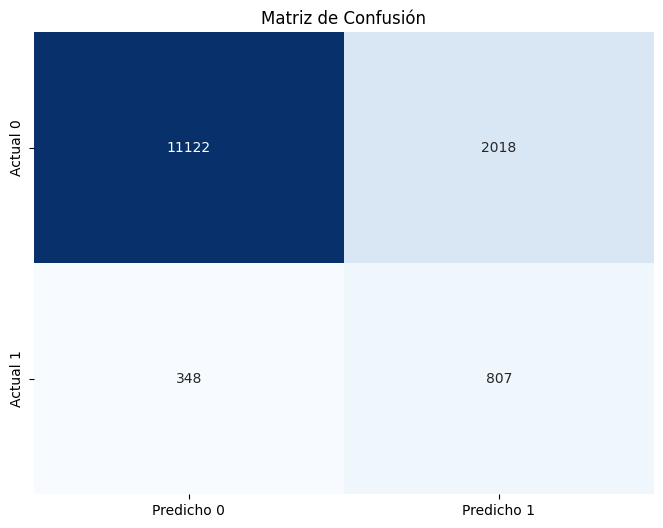

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame para visualizar la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix_xgboost, index=['Actual 0', 'Actual 1'], columns=['Predicho 0', 'Predicho 1'])

# Visualizar la matriz de confusión como una tabla
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()

##### **Análisis de indicadores de negocio**

In [ ]:
# Analizando la longitud del Xtest y Ytest y Ypred
print(f'El tamaño del X_test: {X_test.shape}')
print(f'El tamaño del y_test: {y_test.shape}')
print(f'El tamaño del y_pred_xgboost: {y_pred_xgboost.shape}')
print(f'El tamaño del y_prob_xgboost: {y_prob_xgboost.shape}')

El tamaño del X_test: (14295, 25)
El tamaño del y_test: (14295,)
El tamaño del y_pred_xgboost: (14295,)
El tamaño del y_prob_xgboost: (14295,)


In [ ]:
# Unir los DataFrames a lo largo de las columnas (axis=1)
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_pred_xgboost'] = y_pred_xgboost
df_test['y_prob_xgboost'] = y_prob_xgboost

df_test.head()

,ventilated_apache,age,gcs_eyes_apache,apache_post_operative,d1_spo2_min,d1_resprate_max,d1_temp_min,d1_heartrate_min,map_apache,h1_sysbp_max,...,h1_resprate_min,intubated_apache,resprate_apache,apache_2_diagnosis_302,h1_spo2_max,apache_2_diagnosis_308,h1_resprate_max,y_test,y_pred_xgboost,y_prob_xgboost
1845,0,65,4,0,94.0,36.0,36.7,58.0,156.0,158.0,...,16.0,0,36.0,0,98.0,0,33.0,0,0,0.047705
58017,0,80,4,0,95.0,24.0,36.3,71.0,72.0,147.0,...,19.0,0,26.0,0,96.0,0,23.0,0,0,0.169166
59216,0,72,3,0,98.0,20.0,36.1,88.0,56.0,125.0,...,15.0,0,7.0,0,100.0,0,20.0,0,0,0.322719
25644,0,65,3,0,91.0,29.0,36.3,72.0,116.0,147.0,...,19.0,0,31.0,0,99.0,0,26.0,0,0,0.324092
67882,0,87,4,0,94.0,48.0,36.5,120.0,45.0,122.0,...,28.0,0,43.0,0,95.0,0,28.0,0,1,0.536408


In [ ]:
# Creación del GE y análisis:
# Crear una columna de deciles basada en la columna 'y_prob_xgboost'
df_test['Decil'] = pd.qcut(df_test['y_prob_xgboost'], q=10, labels=list(range(10, 0, -1)))
df_test['Decil'] = df_test['Decil'].astype(int)

# Agregar las métricas por decil para cada variable
resultados_por_decil = df_test.groupby('Decil').agg({'y_test':['count', 'sum', 'mean']})
resultados_por_decil

y_test               
       count  sum      mean
Decil                      
1       1430  577  0.403497
2       1429  233  0.163051
3       1430  136  0.095105
4       1429   70  0.048985
5       1429   50  0.034990
6       1430   37  0.025874
7       1429   24  0.016795
8       1430   14  0.009790
9       1429   13  0.009097
10      1430    1  0.000699

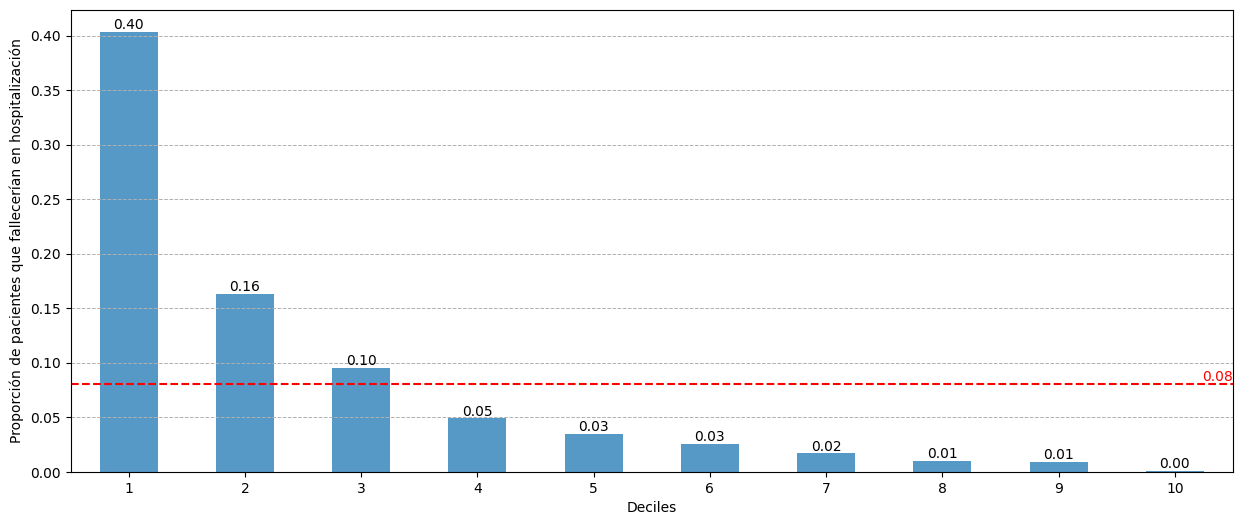

In [ ]:
import matplotlib.pyplot as plt

# Calcular la proporción total de fallecimientos
porcentaje_total_fallecimientos = df_test['y_test'].mean()

# Extraer la media por decil
frecuencia_fallecimientos = resultados_por_decil['y_test']['mean']

# Crear gráfico de barras
plt.figure(figsize=(15, 6))
grafico = frecuencia_fallecimientos.plot(kind='bar', alpha=0.75)
plt.axhline(y=porcentaje_total_fallecimientos, color='red', linestyle='--', label='Media general')

# Etiquetas
plt.xlabel('Deciles')
plt.ylabel('Proporción de pacientes que fallecerían en hospitalización')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Etiquetas de valores en las barras
for i, valor in enumerate(frecuencia_fallecimientos):
    plt.annotate(f'{valor:.2f}', xy=(i, valor), ha='center', va='bottom')

# Etiqueta en la línea de referencia
plt.text(9.5, porcentaje_total_fallecimientos, f'{porcentaje_total_fallecimientos:.2f}',
         ha='right', va='bottom', color='red')

plt.show()

In [ ]:
# Indicadores generales para comparar:
# Agregar las métricas por decil para cada variable
resultados = df_test.agg({'y_test':['count', 'sum', 'mean']})
resultados

,y_test
count,14295.000000
sum,1155.000000
mean,0.080797
